#EXECUTIVE SUMMARY

---



---



**Data Analysis and Feature Engineering for Predicting House Prices**

In this analysis, we embarked on a journey to predict house prices using a dataset called the Ames Housing dataset. The goal was to create a model that accurately estimates the selling prices of houses based on various features. Here's a non-technical summary of the key steps taken:

**Data Loading and Initial Inspection:**
- The analysis began by loading the training and testing datasets from local files.
- We explored the structure of the data to understand its contents, including various features and the target variable (Sales Price).

**Missing Data Analysis:**
- We identified columns with missing data (NaN values) and calculated the percentage of missing values for each feature.
- This helped us understand which features had missing information and decide how to handle them.

**Exploratory Data Analysis (EDA):**
- We visualized the relationship between features with missing values and the Sales Price to identify any potential correlations.
- This step aimed to determine whether missing data had a significant impact on predicting house prices.

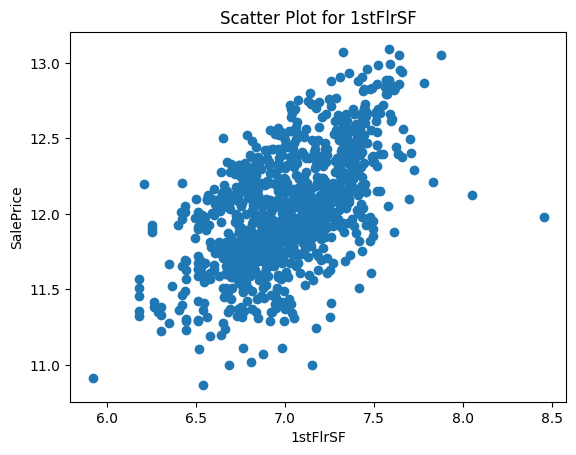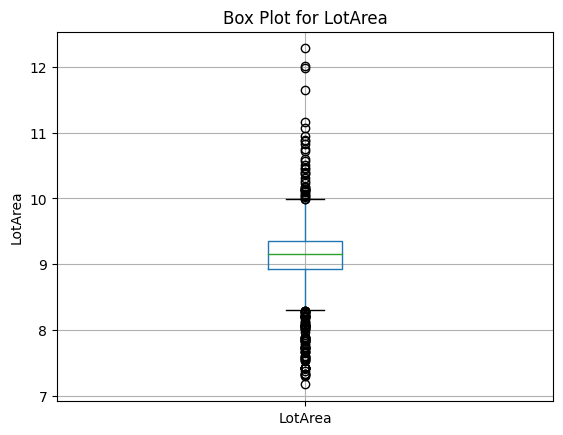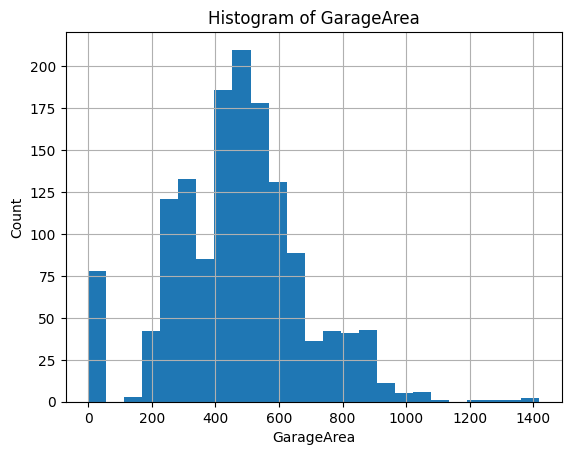

**Numerical and Categorical Features:**
- We separated the dataset into numerical and categorical features.
- Numerical features included values that could be measured, such as areas and years.
- Categorical features represented non-numeric data like neighborhood names and house styles.

**Temporal Variables:**
- We explored temporal variables like "YearBuilt," "YearRemodAdd," and "GarageYrBlt" to understand their relationships with the Sale Price.
- The goal was to discover whether the age of the house or recent renovations had any influence on the selling price.

**Feature Transformation:**
- To improve the model's performance, we applied logarithmic transformation to numerical features with skewed distributions.
- This transformation helped in achieving a more balanced and normal distribution of the data.

**Outlier Detection and Handling:**
- We identified outliers in the dataset and examined their impact on the analysis.
- The Box Plot visualization was used to highlight outliers and understand their distribution in the data.

**Categorical Feature Engineering:**
- We handled categorical features by converting them into numerical values.
- Rare categories were grouped into a single "rare_var" category to prevent overfitting.

**Feature Scaling:**
- The features were standardized using Min-Max scaling to ensure they were on a similar scale for modeling.

**Feature Selection:**
- We employed the Lasso regression model for feature selection, which helped identify the most important features for predicting house prices.
- Features with non-zero coefficients were considered valuable for the model.

**Linear Regression Modeling:**
- We chose Linear Regression as the predictive model due to its simplicity and ease of interpretation.
- The model was trained on the selected features from the training dataset.
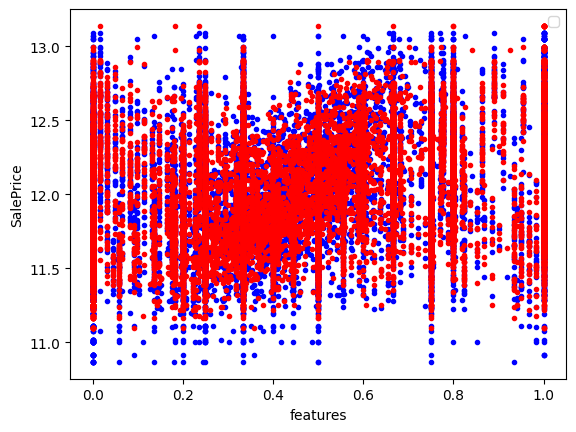

**Prediction and Output:**
- The trained model was used to predict house prices on the test dataset.
- Predictions were made, transformed back from logarithmic values to the original scale, and rounded to integers.
- These predictions provided estimates of the selling prices for the houses in the test dataset.
-  Final RMSE value of **24459** was achieved.

In summary, this analysis involved data cleaning, feature engineering, and selection to prepare the dataset for modeling. Linear Regression was chosen as the predictive model, and it was applied to make house price predictions. The process aimed to create a robust and accurate model for estimating house prices based on various features.


#AMES HOUSING DATA SET
AIM : The purpose of this study is to predict house sales prices using a set of training data
#Loading Dataset
As a first step, we load test and training CSV files from the local drive and save them as training data and testing data variables, respectively.


In [ ]:
from google.colab import files
training_data = files.upload()  #Upload Housing_Data_Train.csv
testing_data = files.upload()  #Housing_Data_Test.csv

Saving Housing_Data_Train.csv to Housing_Data_Train.csv


Saving Housing_Data_Test.csv to Housing_Data_Test.csv


#DataFrame Creation
We will create two separate datasets, 'train_df' which will contain training data with the sales price, and 'test_df' which will contain test data without the sales price.

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
train_data = 'Housing_Data_Train.csv'
test_data = 'Housing_Data_Test.csv'
train_df = pd.read_csv(train_data)
test_df = pd.read_csv(test_data)

###For the purpose of pre-processing, we concatenate the train and test datasets. As part of the prediction process, we will split the train and test data once again later.

NOTE: Combining train and test data will result in data leakage in real life scenarios. This is done in order to provide high levels of accuracy in prediction.

In [ ]:
df = pd.concat([train_df,test_df], axis=0)
df.shape

(1446, 82)

### 'display.max_columns' displays all the columns in the dataset that are

1.   List item
2.   List item

useful for feature analysis.

In [ ]:
pd.pandas.set_option('display.max_columns',None)
df.head()

,Unnamed: 0,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,0,149,20,RL,63.0,7500,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,SawyerW,Norm,Norm,1Fam,1Story,7,5,2004,2005,Gable,CompShg,VinylSd,VinylSd,BrkFace,120.0,TA,TA,PConc,Gd,TA,No,GLQ,680,Unf,0,400,1080,GasA,Ex,Y,SBrkr,1080,0,0,1080,1,0,1,0,3,1,Gd,6,Typ,0,NaN,NaN,NaN,NaN,0,0,NaN,NaN,Y,0,0,0,0,0,0,NaN,NaN,NaN,0,4,2008,WD,Normal,141000.0
1,1,460,50,RL,NaN,7015,Pave,NaN,IR1,Bnk,AllPub,Corner,Gtl,BrkSide,Norm,Norm,1Fam,1.5Fin,5,4,1950,1950,Gable,CompShg,MetalSd,MetalSd,BrkCmn,161.0,TA,TA,CBlock,TA,TA,No,LwQ,185,Unf,0,524,709,GasA,TA,Y,SBrkr,979,224,0,1203,1,0,1,0,3,1,Gd,5,Typ,1,TA,Detchd,1950.0,Unf,1,352,TA,TA,Y,0,0,248,0,0,0,NaN,NaN,NaN,0,7,2009,WD,Normal,110000.0
2,2,1336,20,RL,80.0,9650,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,1Fam,1Story,6,5,1977,1977,Gable,CompShg,Plywood,Plywood,BrkFace,360.0,TA,TA,CBlock,Gd,TA,No,ALQ,686,Unf,0,664,1350,GasA,TA,Y,SBrkr,1334,0,0,1334,0,1,2,0,2,1,TA,6,Typ,1,TA,Attchd,1977.0,RFn,2,630,TA,TA,Y,0,16,0,0,0,0,NaN,NaN,NaN,0,4,2009,WD,Normal,167900.0
3,3,805,20,RL,75.0,9000,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,5,1954,1954,Gable,CompShg,Wd Sdng,Wd Sdng,None,0.0,TA,TA,CBlock,TA,TA,No,LwQ,812,Unf,0,124,936,GasA,TA,Y,SBrkr,1128,0,0,1128,0,0,1,0,2,1,TA,5,Min1,0,NaN,Attchd,1954.0,Unf,1,286,TA,TA,Y,0,0,0,0,0,0,NaN,GdWo,NaN,0,6,2006,WD,Family,118000.0
4,4,1396,60,RL,88.0,12665,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Timber,Norm,Norm,1Fam,2Story,8,5,2005,2006,Hip,CompShg,VinylSd,VinylSd,BrkFace,245.0,Gd,TA,PConc,Gd,Gd,Gd,Unf,0,Unf,0,1094,1094,GasA,Ex,Y,SBrkr,1133,1349,0,2482,0,0,2,1,4,1,Gd,9,Typ,1,Gd,BuiltIn,2005.0,Fin,3,642,TA,TA,Y,144,39,0,0,0,0,NaN,NaN,NaN,0,2,2007,WD,Normal,281213.0


###  Finding the columns with null values and the percentage of NaN values for the columns with null values by running a for loop on the features

In [ ]:
#Percentage of Nan values in each feature.
features_with_na = [features for features in df.columns if df[features].isnull().sum()>1 ]
print(features_with_na)
#printing the precentages of features with NA
for feature in features_with_na:
  print(feature,'with',np.round(df[feature].isnull().mean(),4),'% of NA')

['LotFrontage', 'Alley', 'MasVnrType', 'MasVnrArea', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'FireplaceQu', 'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageQual', 'GarageCond', 'PoolQC', 'Fence', 'MiscFeature', 'SalePrice']
LotFrontage with 0.1791 % of NA
Alley with 0.9378 % of NA
MasVnrType with 0.0055 % of NA
MasVnrArea with 0.0055 % of NA
BsmtQual with 0.0249 % of NA
BsmtCond with 0.0249 % of NA
BsmtExposure with 0.0256 % of NA
BsmtFinType1 with 0.0249 % of NA
BsmtFinType2 with 0.0256 % of NA
FireplaceQu with 0.4737 % of NA
GarageType with 0.0539 % of NA
GarageYrBlt with 0.0539 % of NA
GarageFinish with 0.0539 % of NA
GarageQual with 0.0539 % of NA
GarageCond with 0.0539 % of NA
PoolQC with 0.9959 % of NA
Fence with 0.8084 % of NA
MiscFeature with 0.9627 % of NA
SalePrice with 0.3084 % of NA


#Exploring Data and Analysing Dataset

##Considering the above analysis for NaN, we plot a bar chart for all the features with NaN against Sales Price and determine whether there is a relationship between the two.

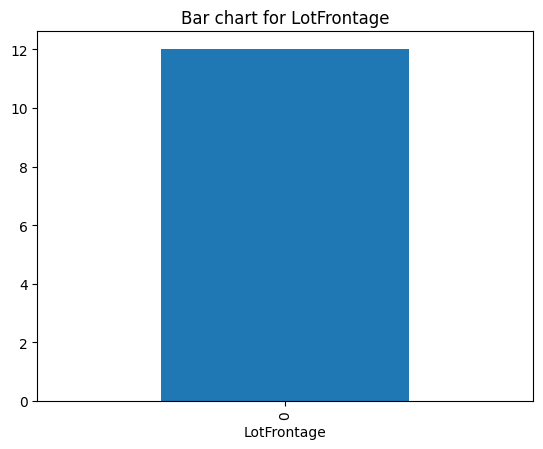

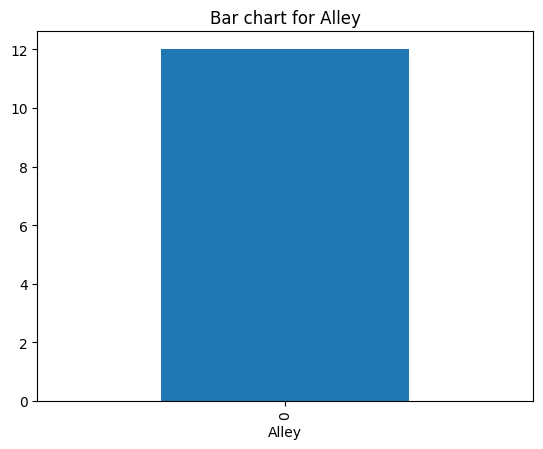

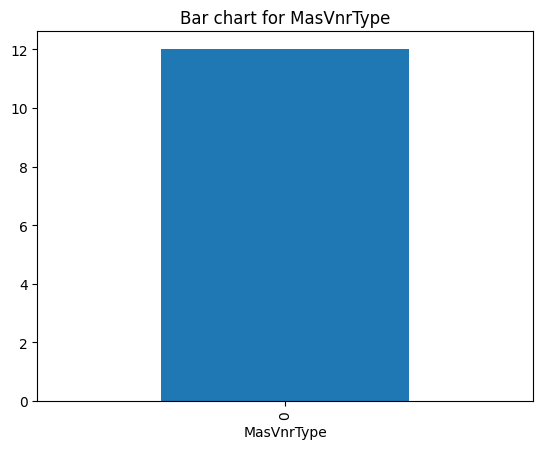

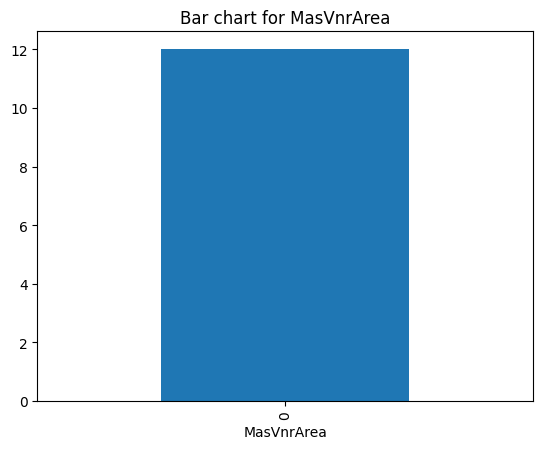

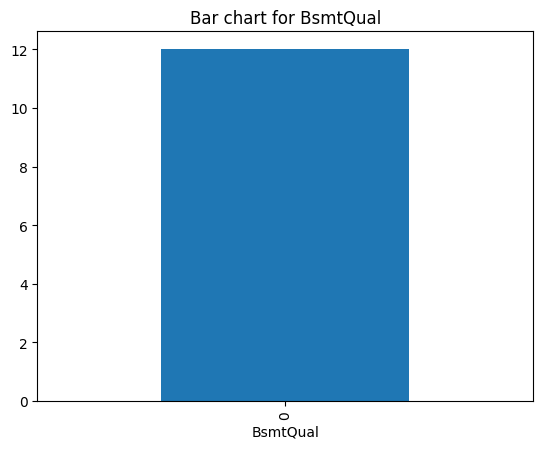

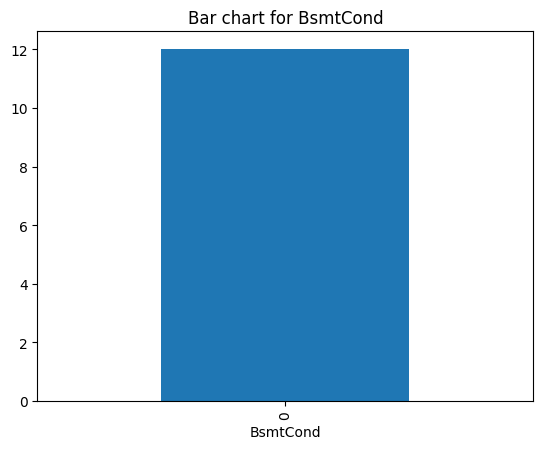

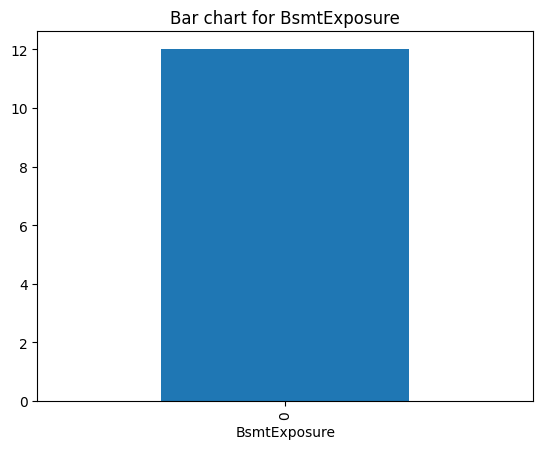

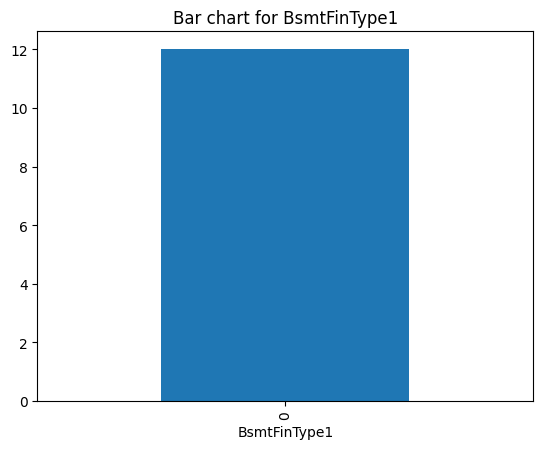

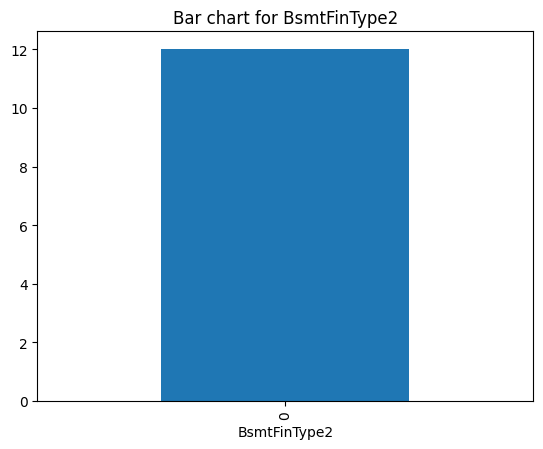

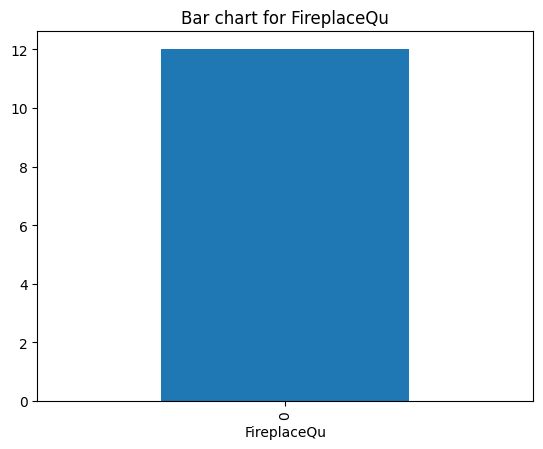

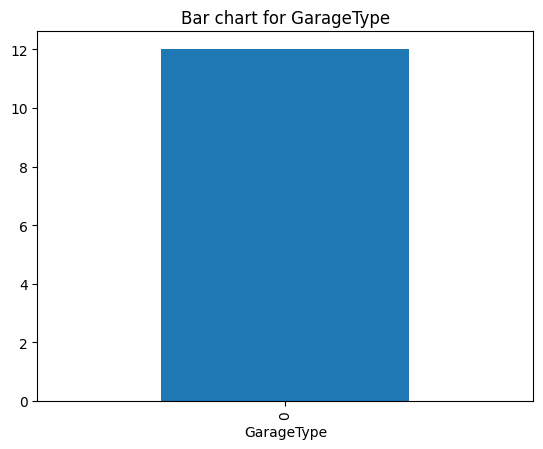

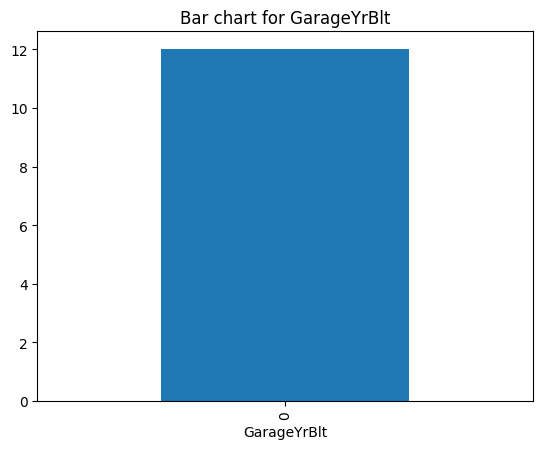

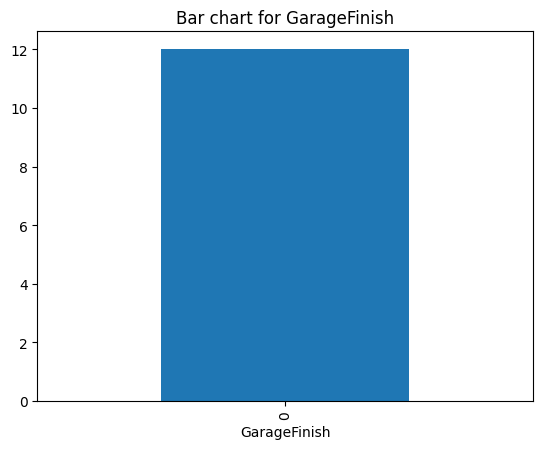

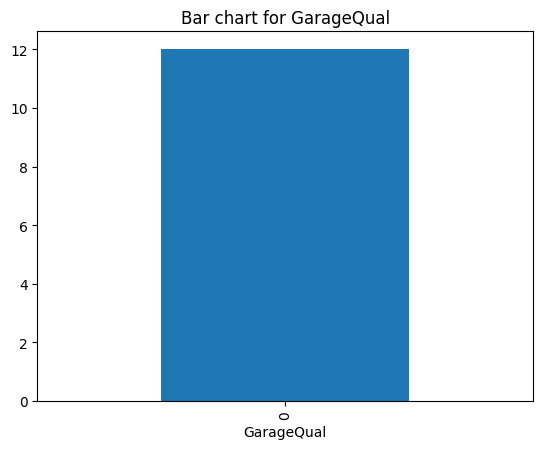

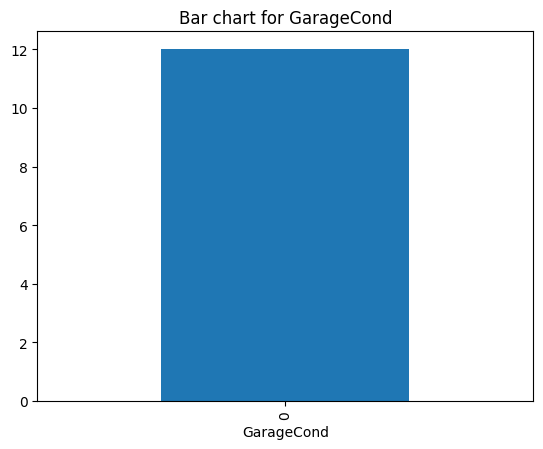

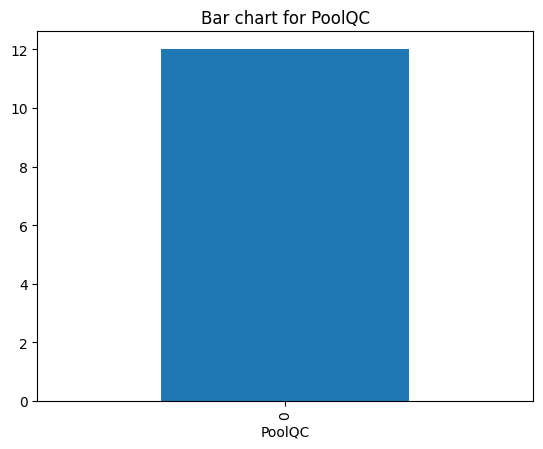

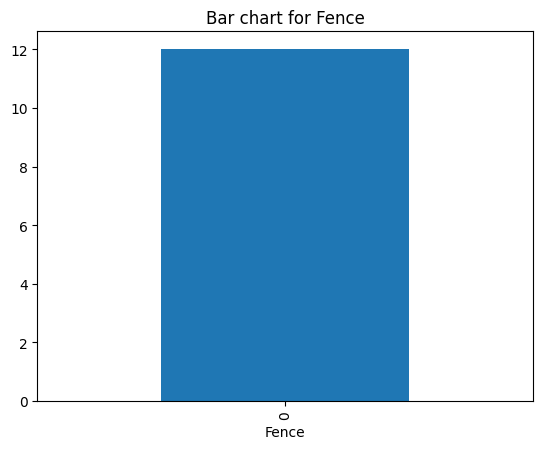

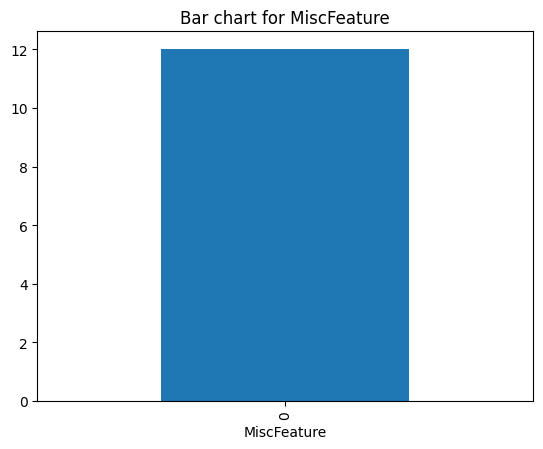

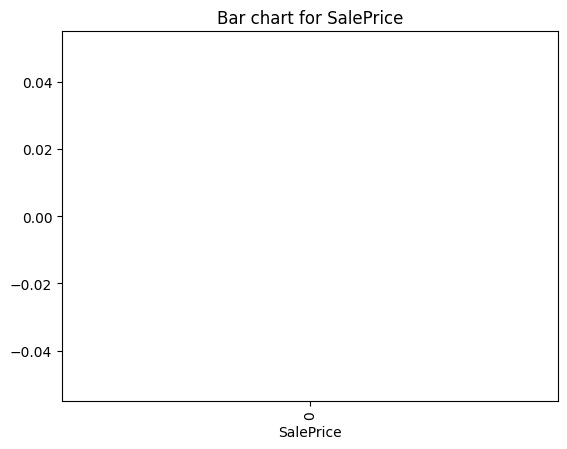

In [ ]:
#Custom colors for the charts, plots and graphs that will used in this analysis.
custom_colors = [
    '#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd',
    '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf',
    '#2e388d', '#cc6a87', '#5a3d55', '#726a95', '#7b4b94',
    '#0b132b', '#275D38', '#B5AC49', '#732B3A', '#540D6E',
    '#1D1D2A', '#324E47', '#0F4C75', '#4056A1', '#AC3B61',
    '#585481', '#CC7357', '#FFE156', '#6B4226', '#0A2463'
]
for feature in features_with_na:
  df_copy = df.copy()
  #Missing data will be marked as 1 or 0 otherwise.
  df_copy[feature] = np.where(df_copy[feature].isnull(),1,0)

  df_copy.groupby(feature)['SalePrice'].mean().plot.bar(color = custom_colors)
  plt.title('Bar chart for ' + feature)
  plt.show()




*italicised text*##For columns with NaN values, there is a clear relationship between the missing values and the values.  In order to achieve a proper output, we need to fill these spaces with a reasonable value

In [ ]:
#Removing ID and Unnamed columns from the dataset as they are not necessary.
columns_to_drop = ['Id','Unnamed:']
df = df.drop(columns=df.columns[0])
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,149,20,RL,63.0,7500,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,SawyerW,Norm,Norm,1Fam,1Story,7,5,2004,2005,Gable,CompShg,VinylSd,VinylSd,BrkFace,120.0,TA,TA,PConc,Gd,TA,No,GLQ,680,Unf,0,400,1080,GasA,Ex,Y,SBrkr,1080,0,0,1080,1,0,1,0,3,1,Gd,6,Typ,0,NaN,NaN,NaN,NaN,0,0,NaN,NaN,Y,0,0,0,0,0,0,NaN,NaN,NaN,0,4,2008,WD,Normal,141000.0
1,460,50,RL,NaN,7015,Pave,NaN,IR1,Bnk,AllPub,Corner,Gtl,BrkSide,Norm,Norm,1Fam,1.5Fin,5,4,1950,1950,Gable,CompShg,MetalSd,MetalSd,BrkCmn,161.0,TA,TA,CBlock,TA,TA,No,LwQ,185,Unf,0,524,709,GasA,TA,Y,SBrkr,979,224,0,1203,1,0,1,0,3,1,Gd,5,Typ,1,TA,Detchd,1950.0,Unf,1,352,TA,TA,Y,0,0,248,0,0,0,NaN,NaN,NaN,0,7,2009,WD,Normal,110000.0
2,1336,20,RL,80.0,9650,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,1Fam,1Story,6,5,1977,1977,Gable,CompShg,Plywood,Plywood,BrkFace,360.0,TA,TA,CBlock,Gd,TA,No,ALQ,686,Unf,0,664,1350,GasA,TA,Y,SBrkr,1334,0,0,1334,0,1,2,0,2,1,TA,6,Typ,1,TA,Attchd,1977.0,RFn,2,630,TA,TA,Y,0,16,0,0,0,0,NaN,NaN,NaN,0,4,2009,WD,Normal,167900.0
3,805,20,RL,75.0,9000,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,5,1954,1954,Gable,CompShg,Wd Sdng,Wd Sdng,None,0.0,TA,TA,CBlock,TA,TA,No,LwQ,812,Unf,0,124,936,GasA,TA,Y,SBrkr,1128,0,0,1128,0,0,1,0,2,1,TA,5,Min1,0,NaN,Attchd,1954.0,Unf,1,286,TA,TA,Y,0,0,0,0,0,0,NaN,GdWo,NaN,0,6,2006,WD,Family,118000.0
4,1396,60,RL,88.0,12665,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Timber,Norm,Norm,1Fam,2Story,8,5,2005,2006,Hip,CompShg,VinylSd,VinylSd,BrkFace,245.0,Gd,TA,PConc,Gd,Gd,Gd,Unf,0,Unf,0,1094,1094,GasA,Ex,Y,SBrkr,1133,1349,0,2482,0,0,2,1,4,1,Gd,9,Typ,1,Gd,BuiltIn,2005.0,Fin,3,642,TA,TA,Y,144,39,0,0,0,0,NaN,NaN,NaN,0,2,2007,WD,Normal,281213.0


#Analysing Numerical Variables
## It is possible to determine which numerical features can be used and which cannot be used by examining the numerical features.


In [ ]:
#list of numerical variables:
numerical_features = [feature for feature in df.columns if df[feature].dtypes != 'O']
print('Number of Numerical Variables:', len(numerical_features))
df[numerical_features].head()

Number of Numerical Variables: 38


,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,149,20,63.0,7500,7,5,2004,2005,120.0,680,0,400,1080,1080,0,0,1080,1,0,1,0,3,1,6,0,NaN,0,0,0,0,0,0,0,0,0,4,2008,141000.0
1,460,50,NaN,7015,5,4,1950,1950,161.0,185,0,524,709,979,224,0,1203,1,0,1,0,3,1,5,1,1950.0,1,352,0,0,248,0,0,0,0,7,2009,110000.0
2,1336,20,80.0,9650,6,5,1977,1977,360.0,686,0,664,1350,1334,0,0,1334,0,1,2,0,2,1,6,1,1977.0,2,630,0,16,0,0,0,0,0,4,2009,167900.0
3,805,20,75.0,9000,5,5,1954,1954,0.0,812,0,124,936,1128,0,0,1128,0,0,1,0,2,1,5,0,1954.0,1,286,0,0,0,0,0,0,0,6,2006,118000.0
4,1396,60,88.0,12665,8,5,2005,2006,245.0,0,0,1094,1094,1133,1349,0,2482,0,0,2,1,4,1,9,1,2005.0,3,642,144,39,0,0,0,0,0,2,2007,281213.0


#Temporal Variables
In the data set, there is a 4-year feature's that can assist in the prediction of the house prices.  As an example, one could compare the price difference between the time the house was bought and sold based on its age.

In [ ]:
#List of variables that contain year information
year_feature = [feature for feature in numerical_features if 'Yr' in feature or 'Year' in feature]
year_feature

['YearBuilt', 'YearRemodAdd', 'GarageYrBlt', 'YrSold']

In [ ]:
#Analysis for year feature.
for feature in year_feature:
  print(feature, df[feature].unique())
  print("Number of unique years for the above category",len(df[feature].unique()))

YearBuilt [2004 1950 1977 1954 2005 1923 1989 1971 1982 2007 1994 2006 1973 1940
 1960 1915 1998 1959 1990 1976 1949 1930 1972 2003 1955 2000 1920 1948
 1958 2002 2001 1957 1947 1941 1935 2008 1968 1992 1925 1999 1969 1952
 1967 1961 1970 1938 1932 1985 1922 1924 1962 1951 1910 1966 2009 1963
 1995 1965 1980 1945 1978 1993 1936 1988 1964 1939 1913 1937 1981 1900
 1921 1953 1885 1974 1927 1956 1997 1872 1996 1946 1898 1975 1904 1916
 1914 1987 1979 1931 1928 1986 1934 1875 1918 1880 1929 1919 1906 1911
 1926 1890 1984 1908 1991 1882 1892 1942 1983 1912 2010 1893 1917 1905]
Number of unique years for the above category 112
YearRemodAdd [2005 1950 1977 1954 2006 1989 1971 2008 1994 1995 1973 1999 1960 1982
 1998 1959 1990 1976 2003 1992 1972 2004 1955 2000 2001 1958 2002 1957
 1968 1969 1952 2007 1967 1970 1985 1962 1951 1966 2009 1963 1996 1965
 1980 1997 1978 1993 1964 1961 1981 1991 1956 1987 1975 1986 1988 1953
 1979 1974 1983 1984 2010]
Number of unique years for the above category 6

### We have listed the number of unique features in each category.  For each feature, we can see a continuous sequence of years

Text(0.5, 1.0, 'Housing Price Vs Year Sold')

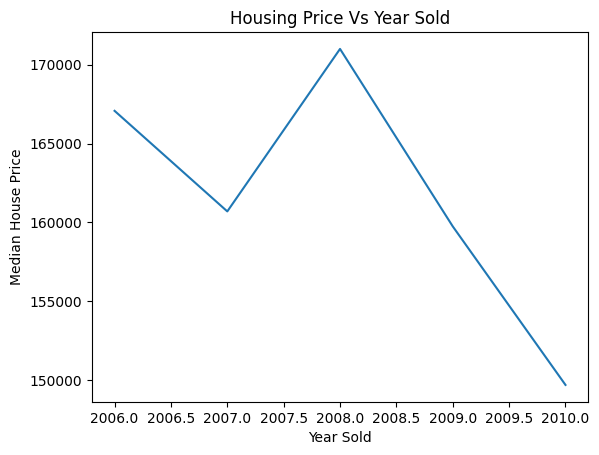

In [ ]:
#Analysing the temporal Datetime Variable:
df.groupby('YrSold')['SalePrice'].median().plot()
plt.xlabel("Year Sold")
plt.ylabel('Median House Price')
plt.title('Housing Price Vs Year Sold')

###The above graph cannot be true.  As the year progresses, we observe an abnormal reduction in the price.

###In order to determine the correct median value for each year, we need a plot with the individual year price and the sales price for each house. This will enable us to identify when the house was bought and when it was sold.



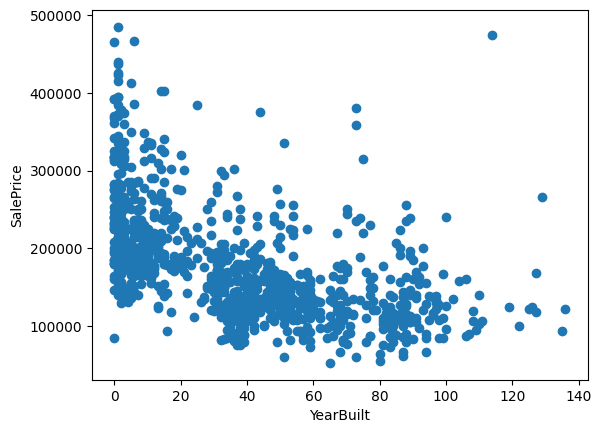

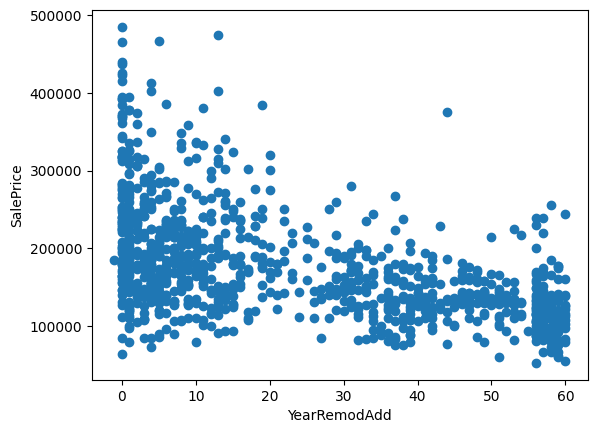

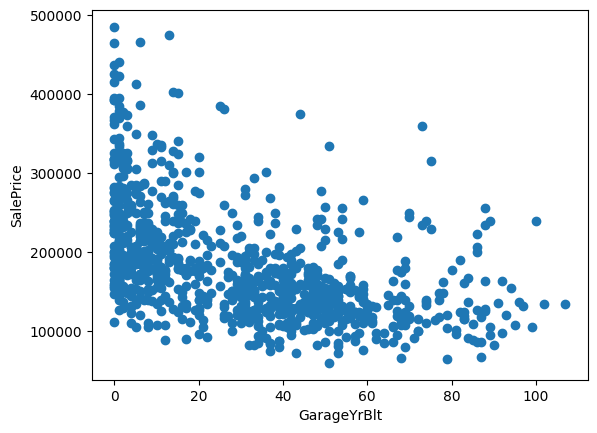

In [ ]:
#Comparing all the year features agains the sales price
for feature in year_feature:
    if feature != 'YrSold':
      df1 = df.copy()  #copying dataset into a dummy variable for analysis.
      df1[feature] = df1['YrSold'] - df1[feature]
      plt.scatter(df1[feature],df1['SalePrice'])
      plt.xlabel(feature)
      plt.ylabel('SalePrice')
      plt.show()

In [ ]:
#Lets further dig into Numerical Values.  There are discrete and continous variable in Numerical Values.
#Filtering discrete features from the dataset
discrete_feature=[feature for feature in numerical_features if len(df[feature].unique())<25 and feature not in year_feature+['Id']]
print("Discrete Variables Count: {}".format(len(discrete_feature)))
df[discrete_feature].head()

Discrete Variables Count: 17


,MSSubClass,OverallQual,OverallCond,LowQualFinSF,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,3SsnPorch,PoolArea,MiscVal,MoSold
0,20,7,5,0,1,0,1,0,3,1,6,0,0,0,0,0,4
1,50,5,4,0,1,0,1,0,3,1,5,1,1,0,0,0,7
2,20,6,5,0,0,1,2,0,2,1,6,1,2,0,0,0,4
3,20,5,5,0,0,0,1,0,2,1,5,0,1,0,0,0,6
4,60,8,5,0,0,0,2,1,4,1,9,1,3,0,0,0,2


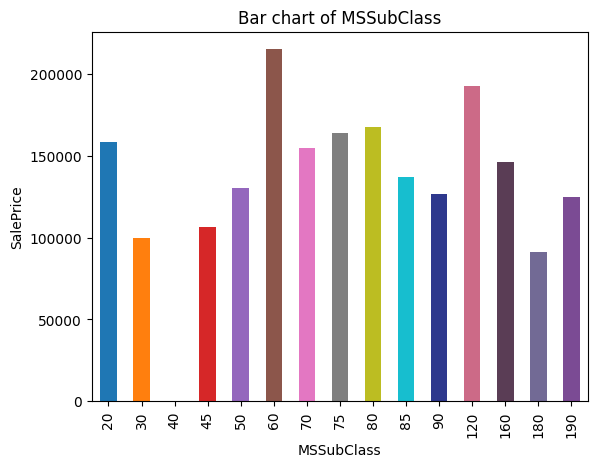

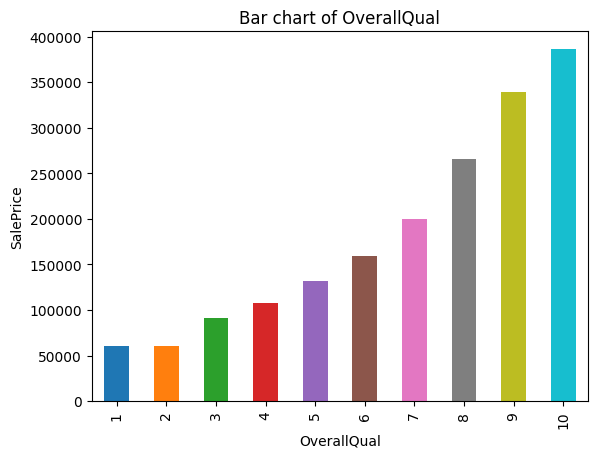

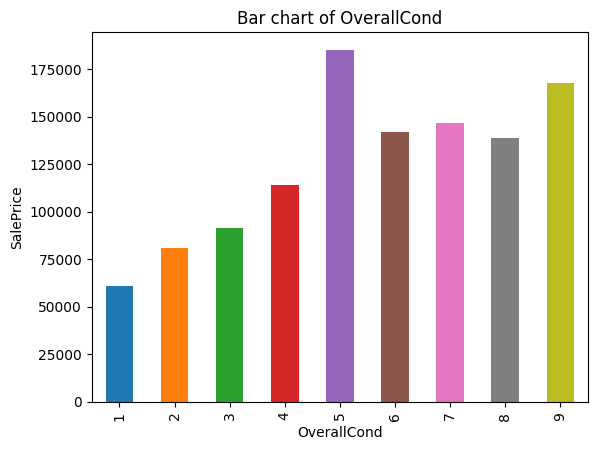

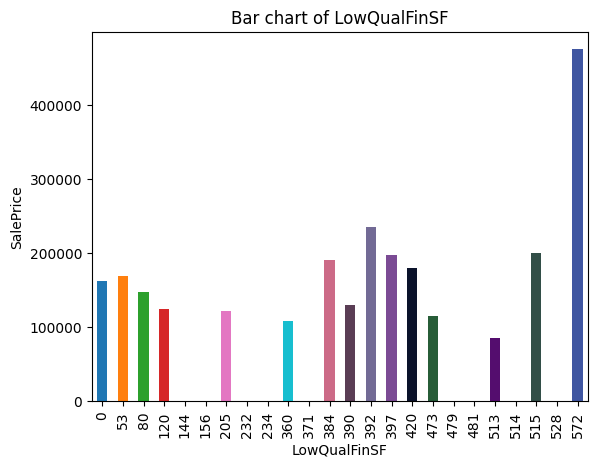

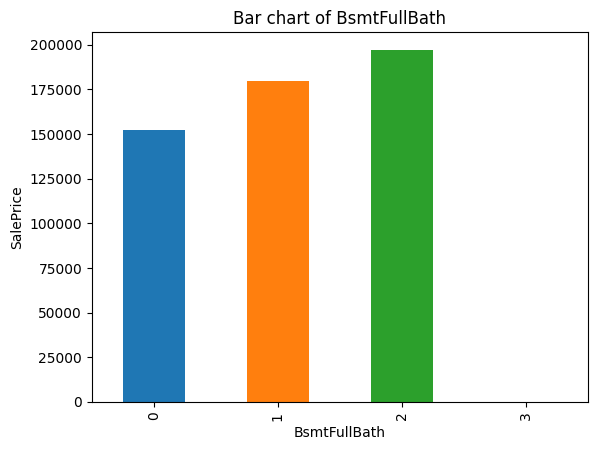

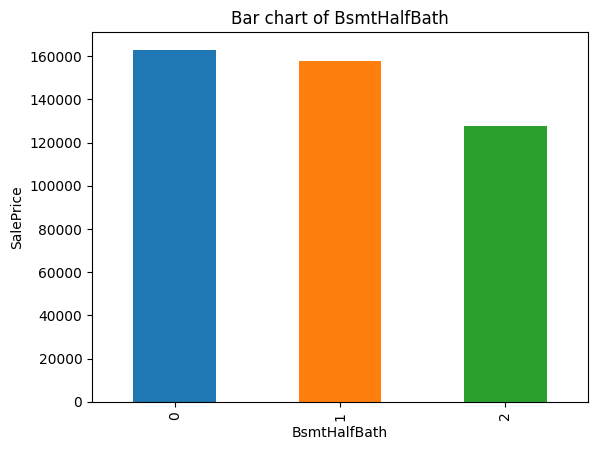

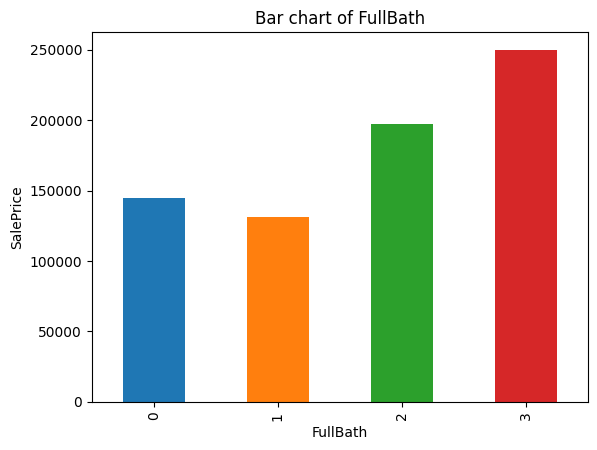

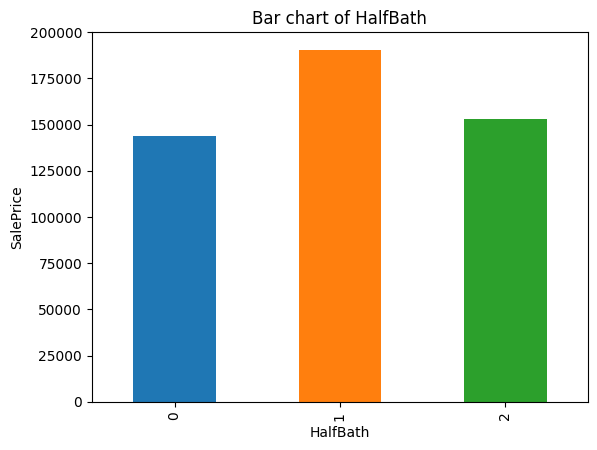

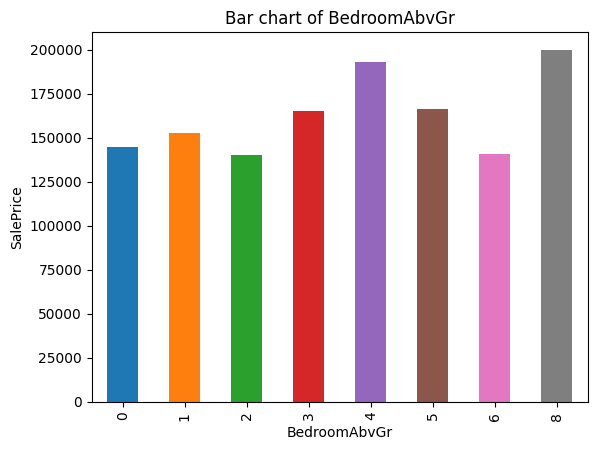

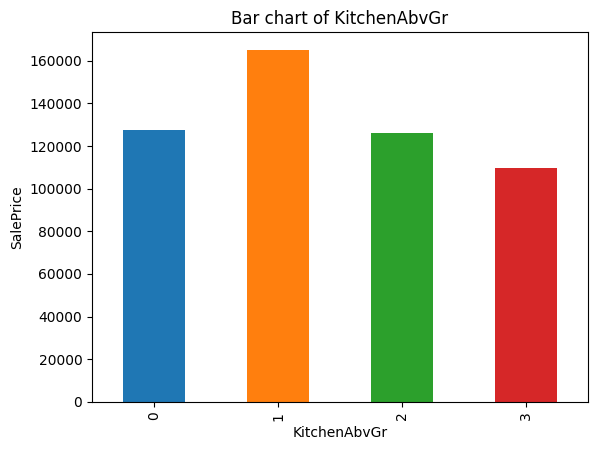

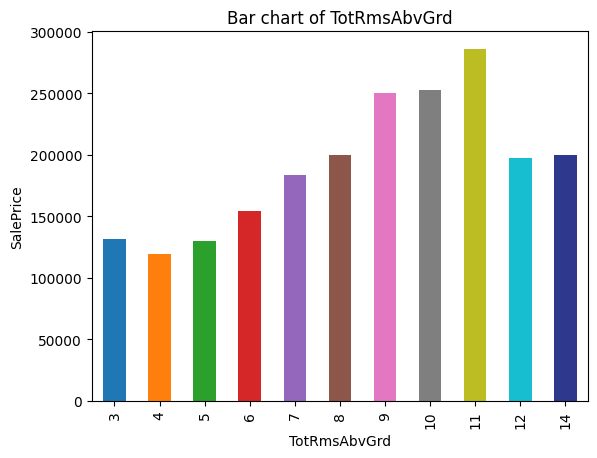

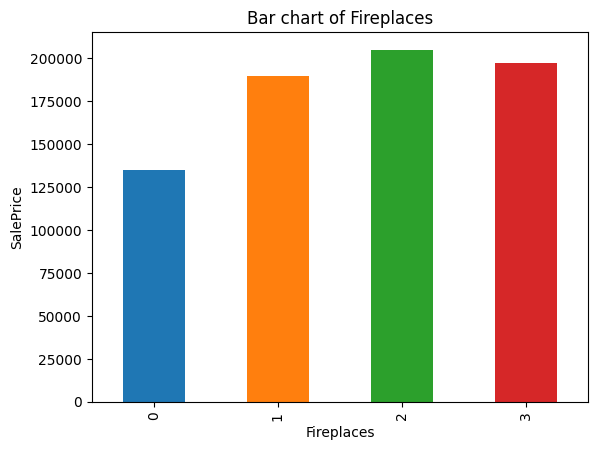

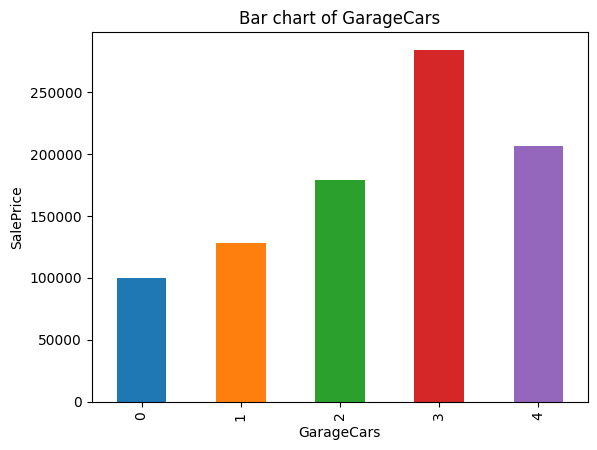

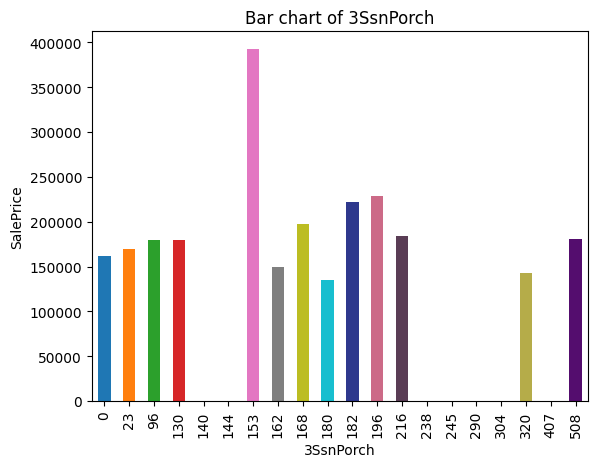

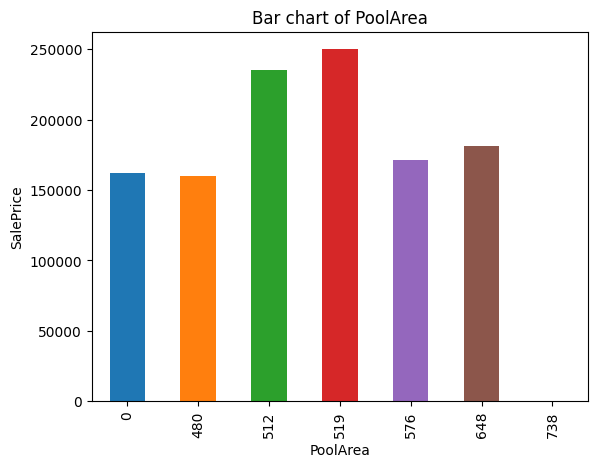

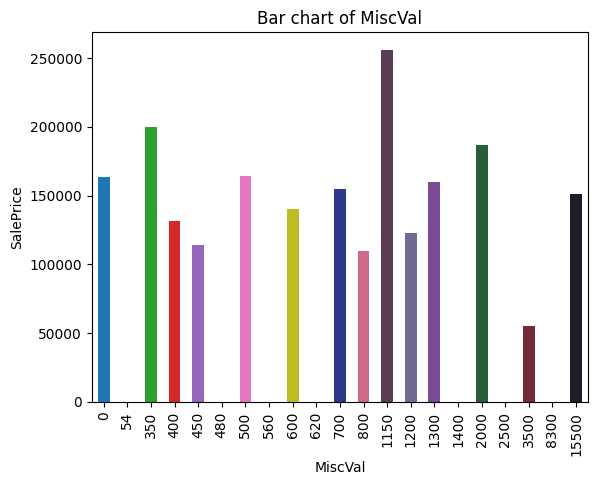

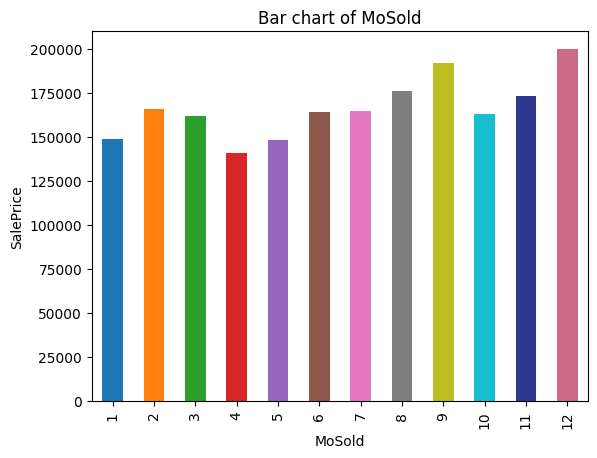

In [ ]:
#Relationship between Discrete values and Numerical Values.
for feature in discrete_feature:
  df1 = df.copy()
  df.groupby(feature)['SalePrice'].median().plot.bar(color=custom_colors)
  plt.xlabel(feature)
  plt.ylabel('SalePrice')
  plt.title('Bar chart of ' + feature)
  plt.show()

###Despite the fact that some features have experienced exponential growth, other features have not changed and some features have stagnated.

['LotFrontage', 'LotArea', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', 'ScreenPorch', 'SalePrice']


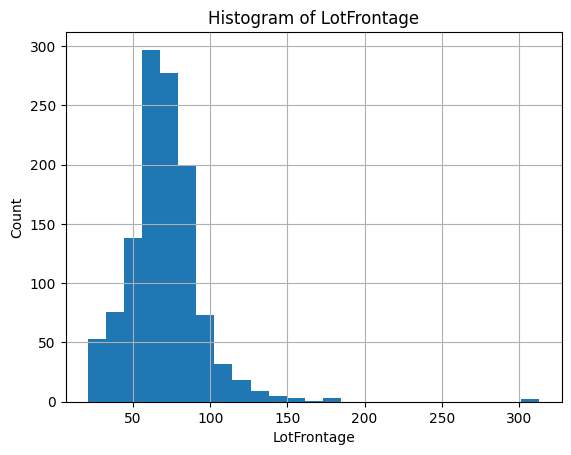

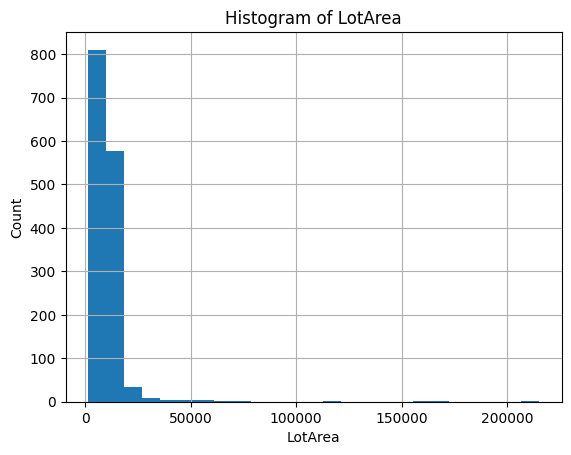

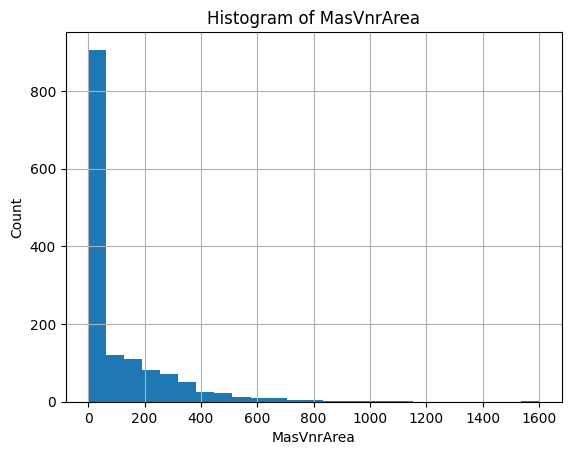

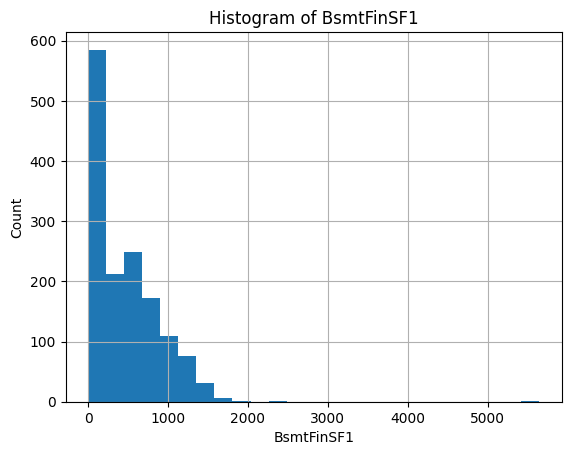

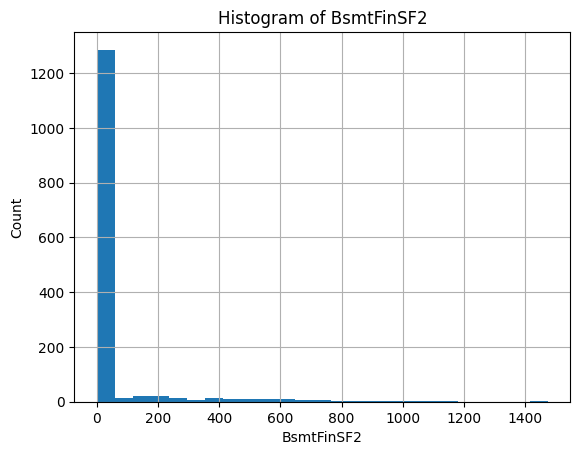

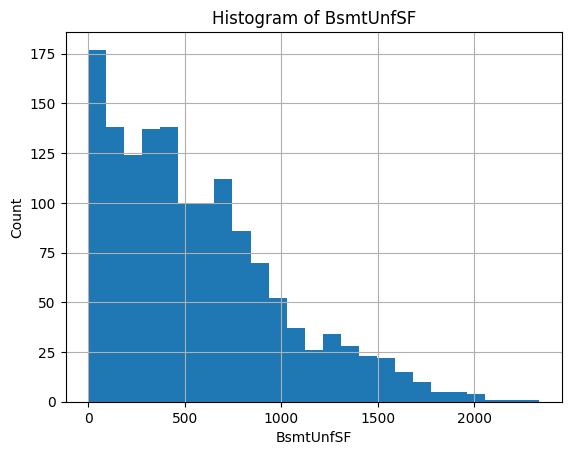

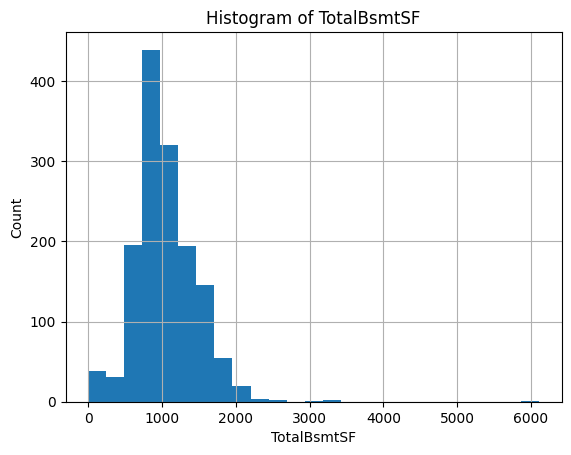

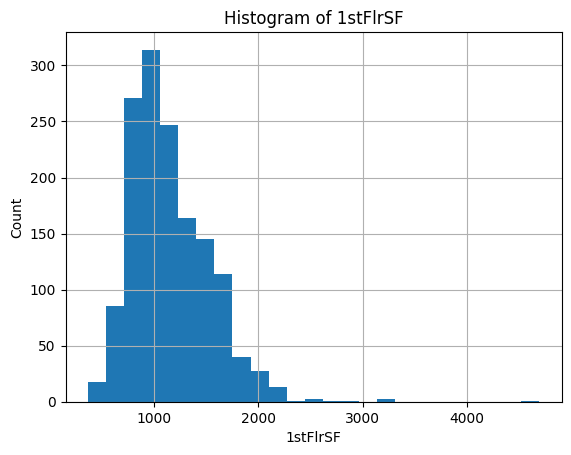

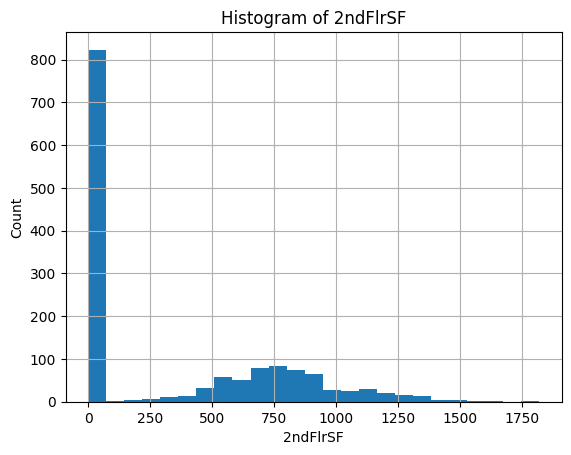

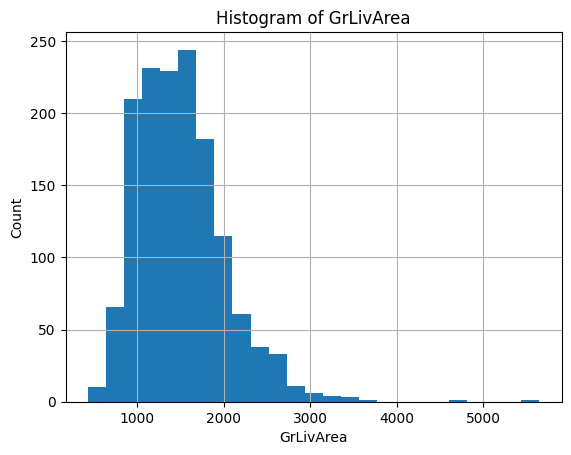

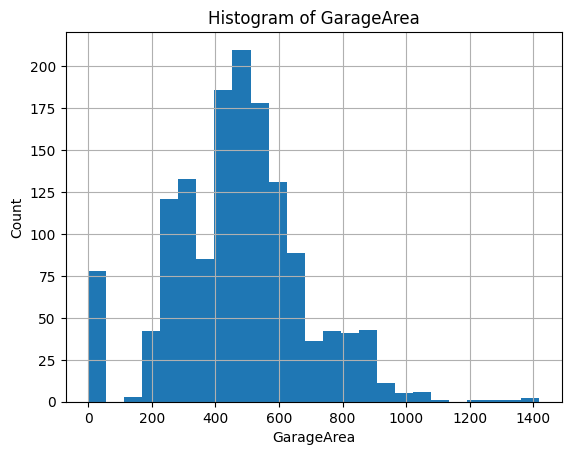

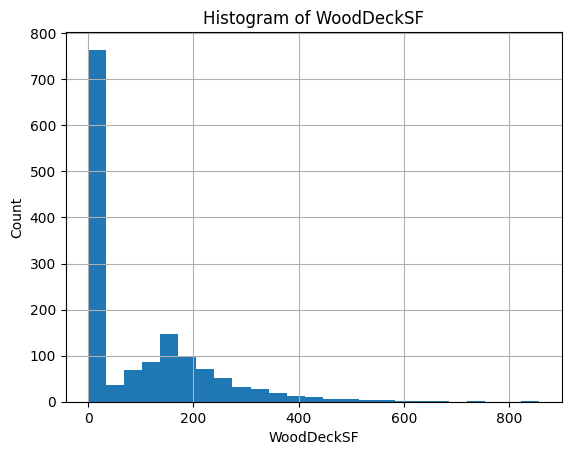

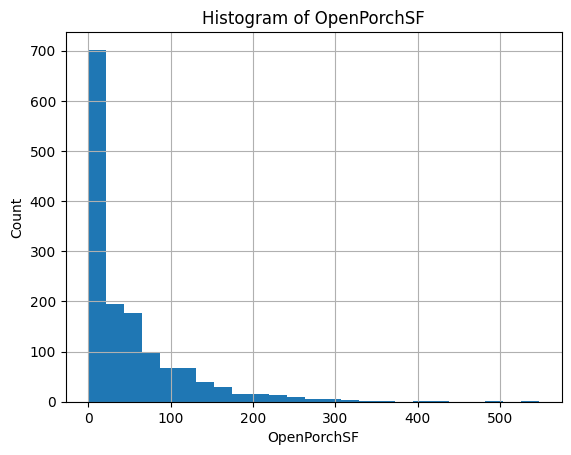

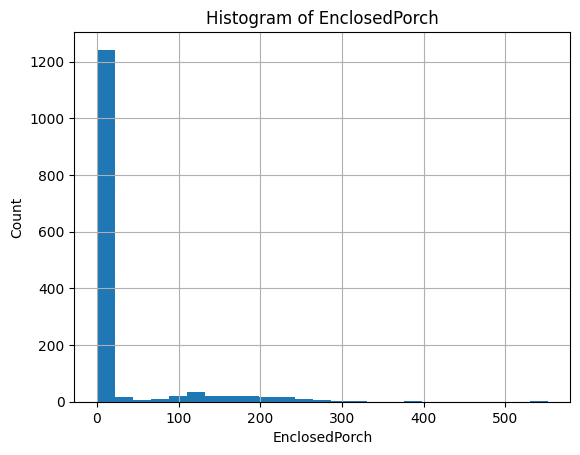

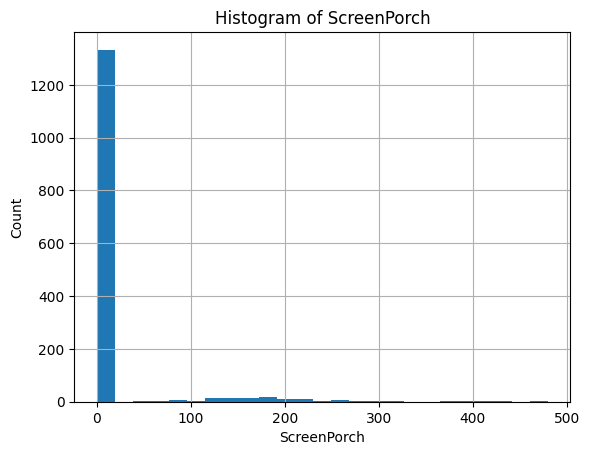

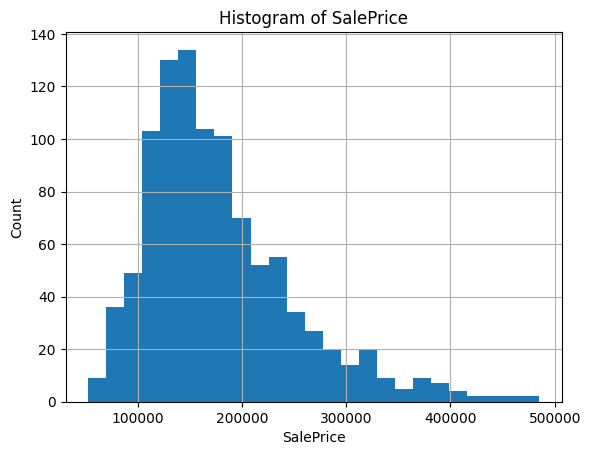

In [ ]:
#Analysing continous feature of Numerical Values:
#Filtering continous features from the dataset
continous_variable = [feature for feature in numerical_features if feature not in discrete_feature + year_feature+['Id']]
print(continous_variable)

#Creating histograms to analyse the distribution of continous variables
for feature in continous_variable:
  df1 = df.copy()
  df1[feature].hist(bins=25)
  plt.xlabel(feature)
  plt.ylabel('Count')
  plt.title('Histogram of '+feature)
  plt.show()


###From the above histograms, most of the contours exhibit a normal distribution. Therefore, we can apply Logarithmic Transformation to the data.

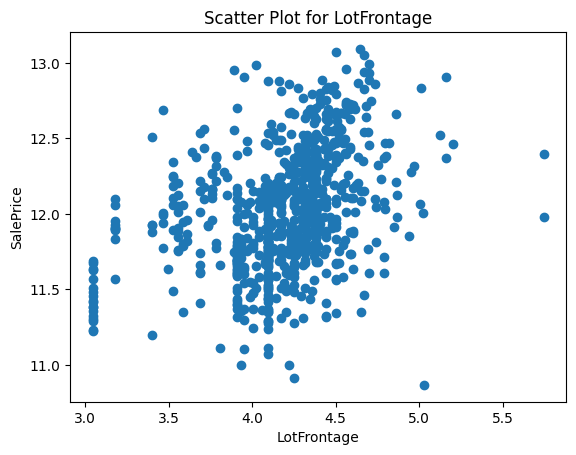

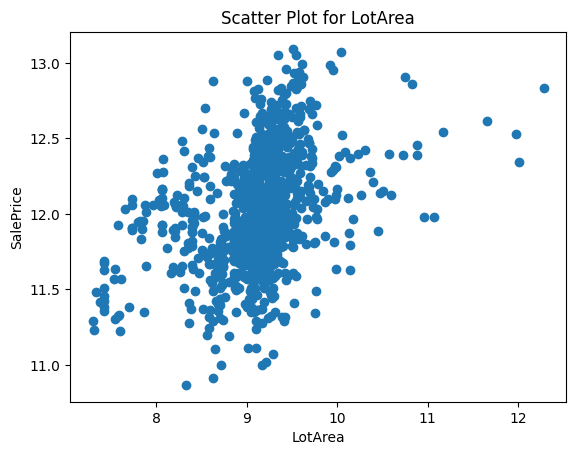

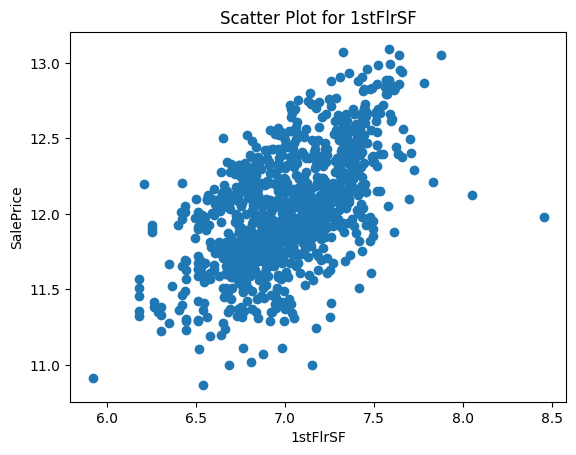

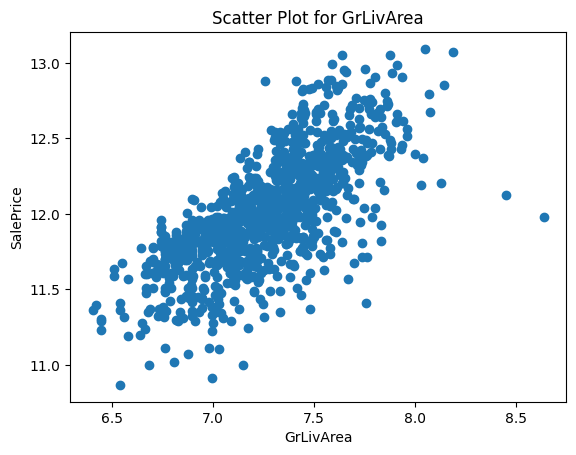

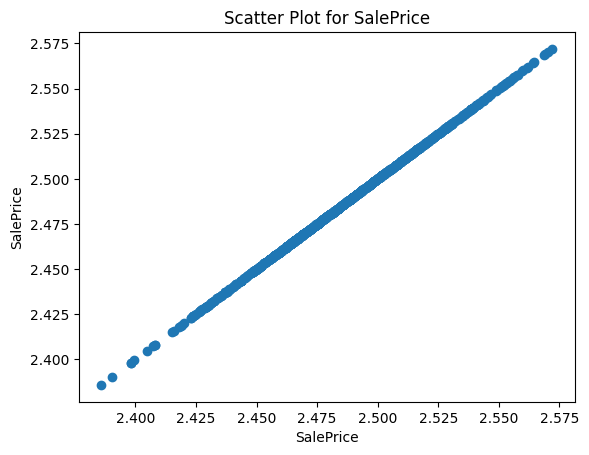

In [ ]:
#Applying Logarithmic Transfromation
for feature in continous_variable:
  df1 = df.copy()
  if 0 in df1[feature].unique():
    pass
  else:
    df1[feature] = np.log(df1[feature])
    df1['SalePrice'] = np.log(df1['SalePrice'])
    plt.scatter(df1[feature],df1['SalePrice'])
    plt.xlabel(feature)
    plt.ylabel('SalePrice')
    plt.title('Scatter Plot for ' + feature)
    plt.show()



###The scatter plot above illustrates an exponential growth between each value on the x-axis and y-axis.  Additionally, we can observe some outliers in the dataset for each feature except for lastone.

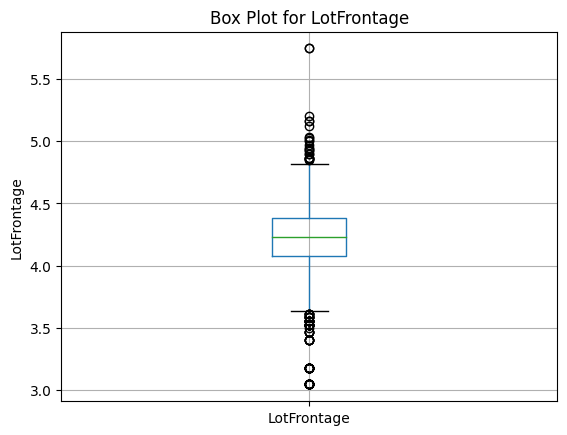

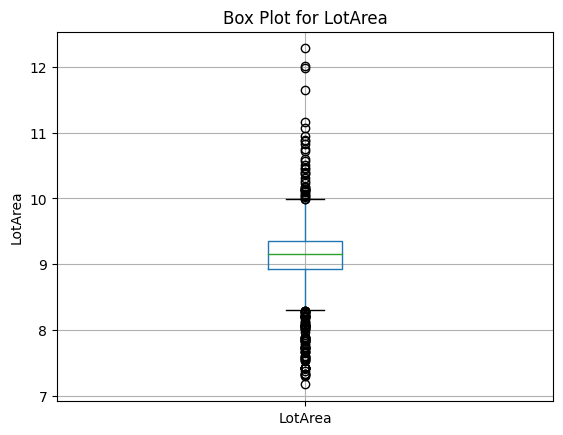

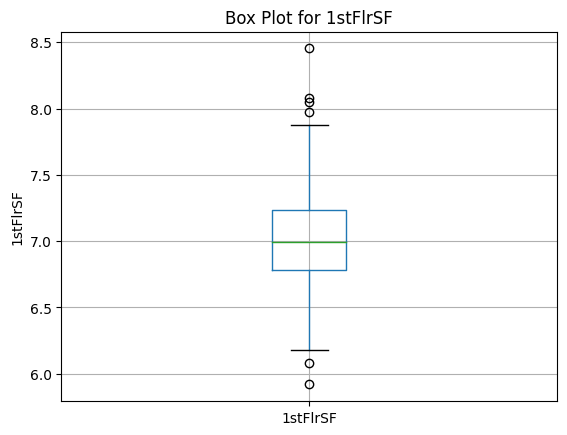

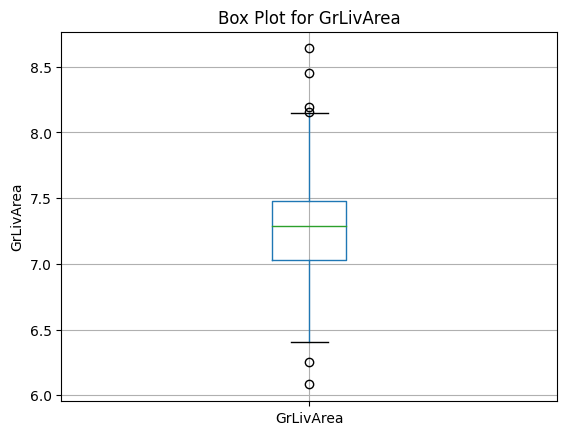

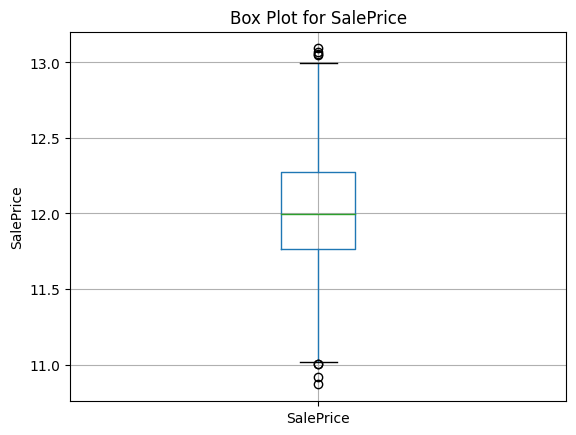

In [ ]:
#Finding the Outliers in the continous variables:
for feature in continous_variable:
  df1 = df.copy()
  if 0 in df1[feature].unique():
    pass
  else:
    df1[feature] = np.log(df1[feature])
    df1.boxplot(column = feature)
    plt.ylabel(feature)
    plt.title('Box Plot for ' + feature)
    plt.show()

###In the above graph, we can see the outliers in the continuous variables with the dataset for each feature.  Lot Frontage has a large number of outliers and a small IQR as well as small zones in Q1, Q2, and Q3.

#Analysing features under Categorical Data



In [ ]:
from pandas.core.groupby import categorical
#features under categorical Feature
categorical_feature = [feature for feature in df.columns if df[feature].dtypes == 'O']
df[categorical_feature].head()

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,SawyerW,Norm,Norm,1Fam,1Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,TA,TA,PConc,Gd,TA,No,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,NaN,NaN,NaN,NaN,NaN,Y,NaN,NaN,NaN,WD,Normal
1,RL,Pave,NaN,IR1,Bnk,AllPub,Corner,Gtl,BrkSide,Norm,Norm,1Fam,1.5Fin,Gable,CompShg,MetalSd,MetalSd,BrkCmn,TA,TA,CBlock,TA,TA,No,LwQ,Unf,GasA,TA,Y,SBrkr,Gd,Typ,TA,Detchd,Unf,TA,TA,Y,NaN,NaN,NaN,WD,Normal
2,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,1Fam,1Story,Gable,CompShg,Plywood,Plywood,BrkFace,TA,TA,CBlock,Gd,TA,No,ALQ,Unf,GasA,TA,Y,SBrkr,TA,Typ,TA,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
3,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,Gable,CompShg,Wd Sdng,Wd Sdng,None,TA,TA,CBlock,TA,TA,No,LwQ,Unf,GasA,TA,Y,SBrkr,TA,Min1,NaN,Attchd,Unf,TA,TA,Y,NaN,GdWo,NaN,WD,Family
4,RL,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Timber,Norm,Norm,1Fam,2Story,Hip,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,Gd,Gd,Unf,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,Gd,BuiltIn,Fin,TA,TA,Y,NaN,NaN,NaN,WD,Normal


In [ ]:
#printing unique categories in each feature.
for feature in categorical_feature:
  print('The feature is {} and the number of categories are {}'.format(feature,len(df[feature].unique())))

The feature is MSZoning and the number of categories are 5
The feature is Street and the number of categories are 2
The feature is Alley and the number of categories are 3
The feature is LotShape and the number of categories are 4
The feature is LandContour and the number of categories are 4
The feature is Utilities and the number of categories are 2
The feature is LotConfig and the number of categories are 5
The feature is LandSlope and the number of categories are 3
The feature is Neighborhood and the number of categories are 25
The feature is Condition1 and the number of categories are 9
The feature is Condition2 and the number of categories are 8
The feature is BldgType and the number of categories are 5
The feature is HouseStyle and the number of categories are 8
The feature is RoofStyle and the number of categories are 6
The feature is RoofMatl and the number of categories are 8
The feature is Exterior1st and the number of categories are 15
The feature is Exterior2nd and the numb

###The values for Neighborhood, Exterior1st, Exterior2nd, and SaleType have many unique values, which may lead to inconsistencies in the data during the prediction process

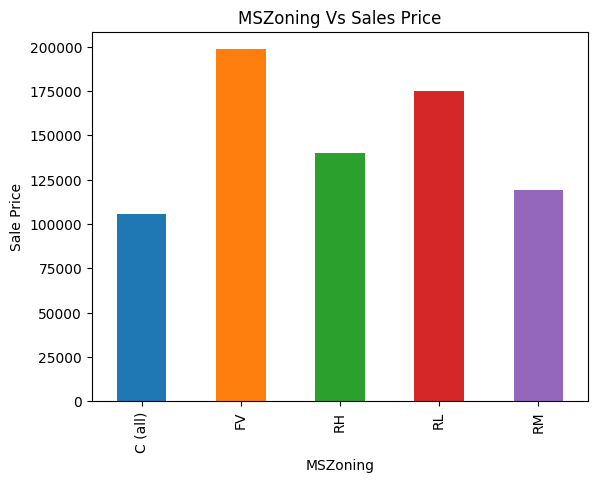

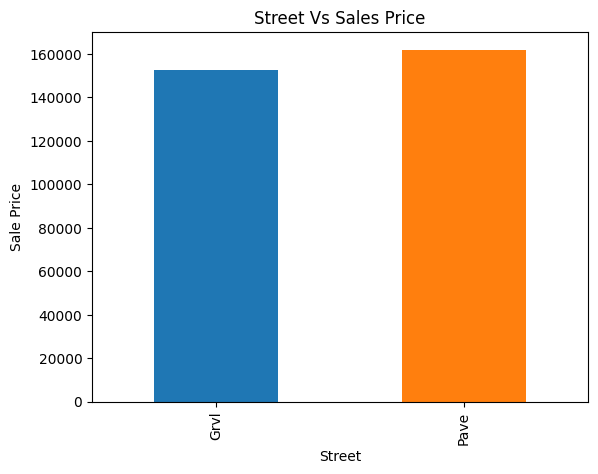

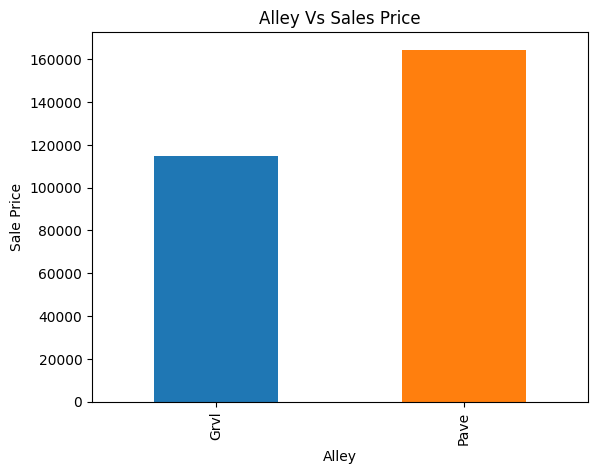

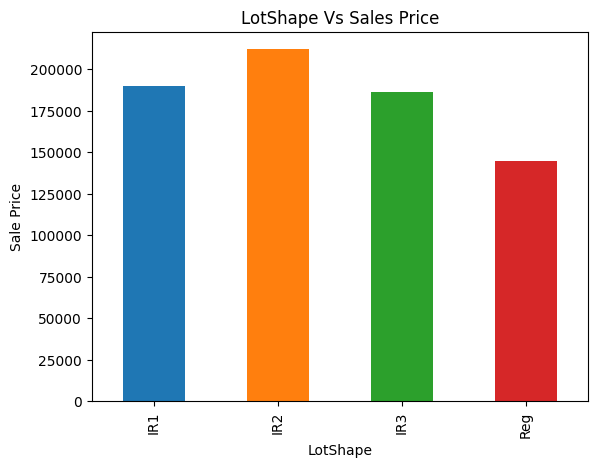

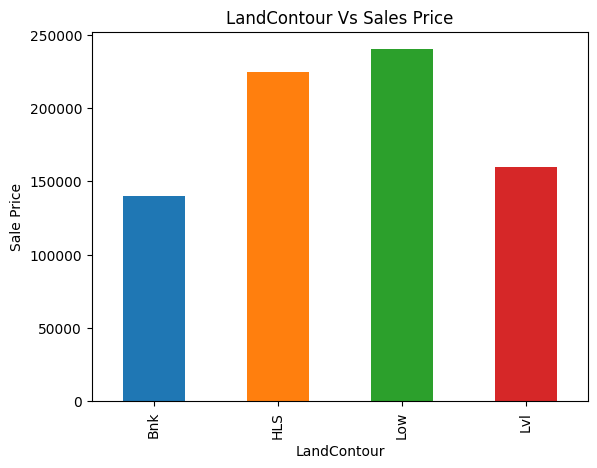

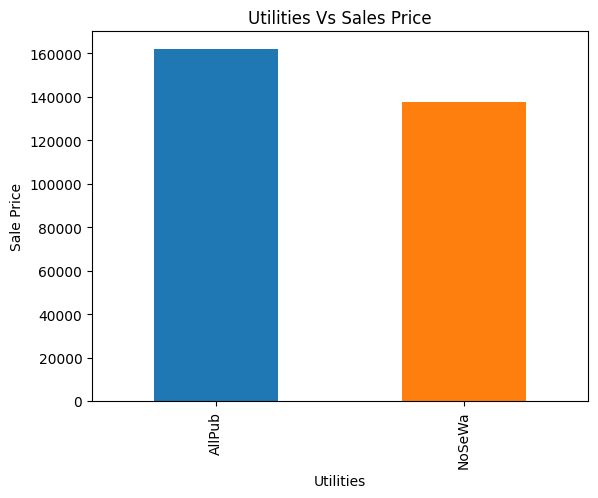

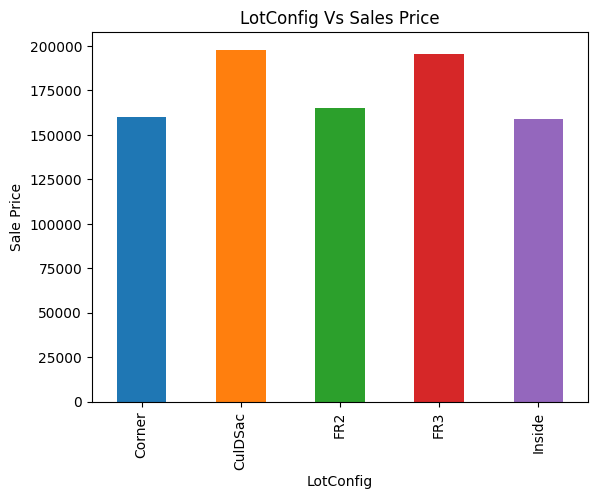

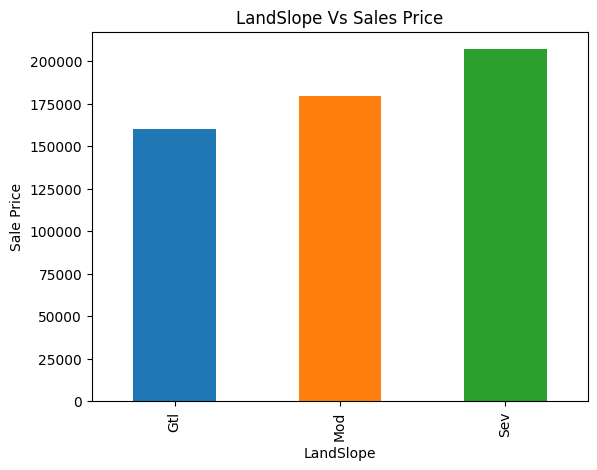

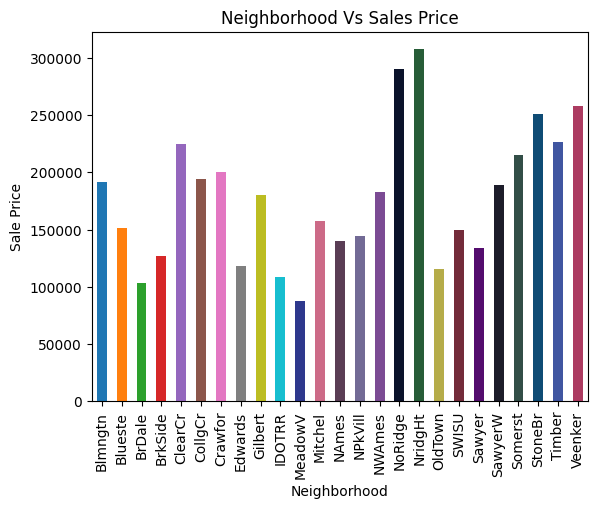

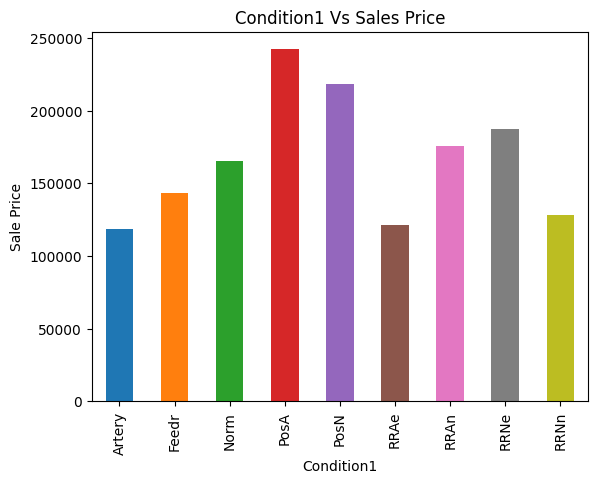

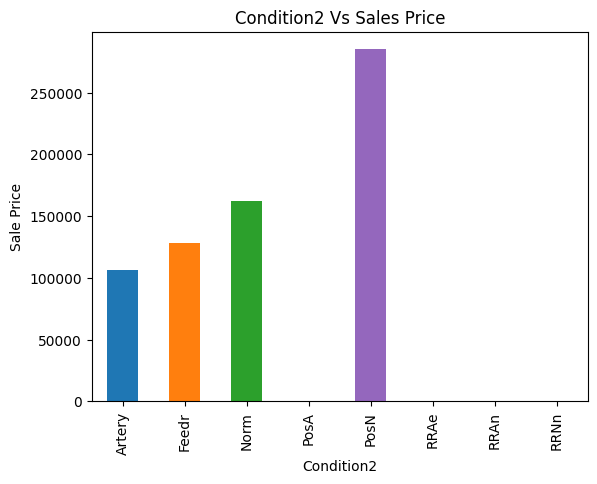

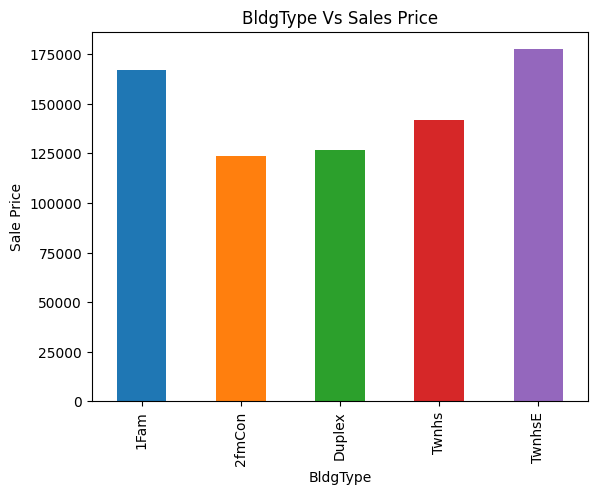

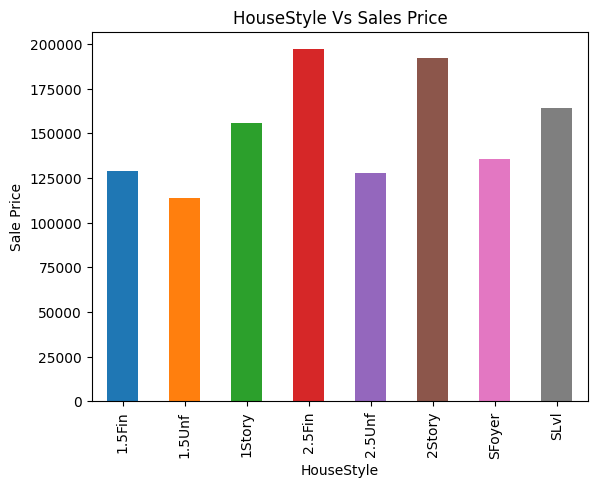

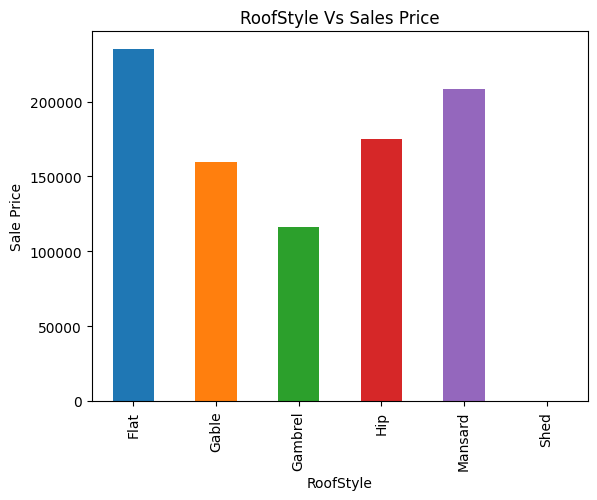

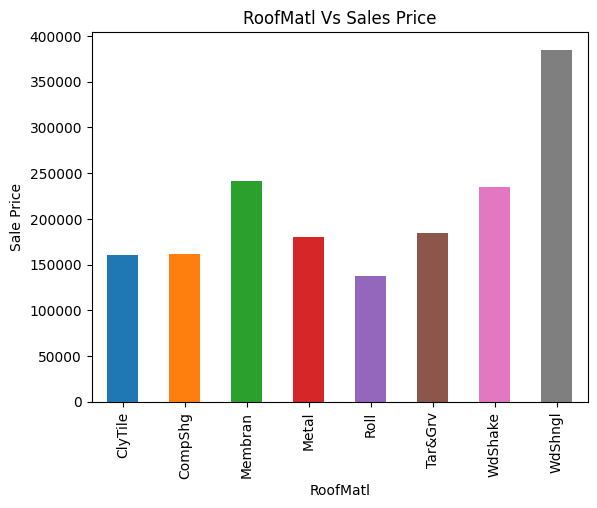

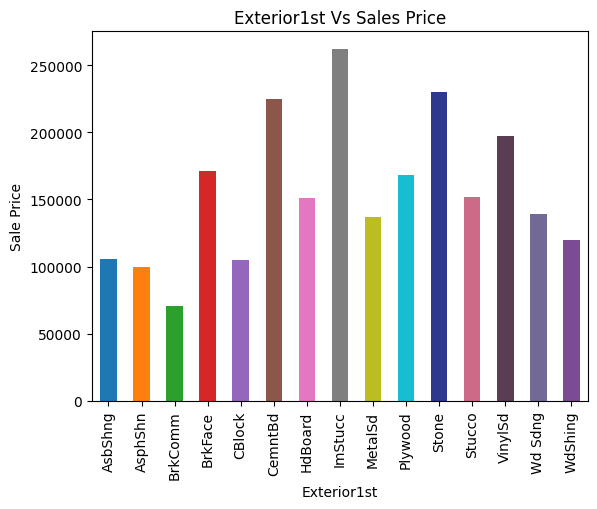

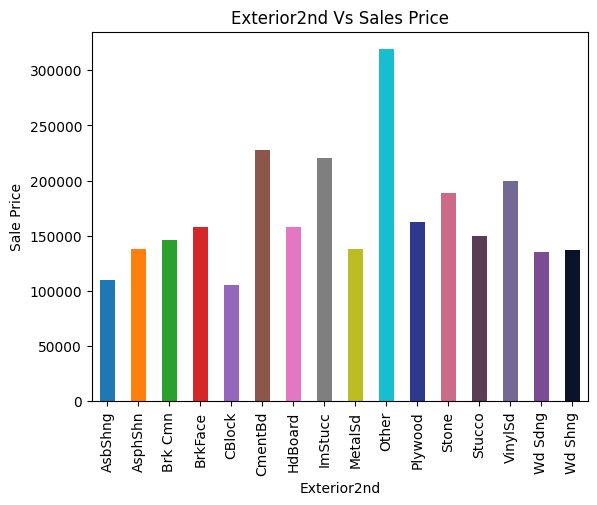

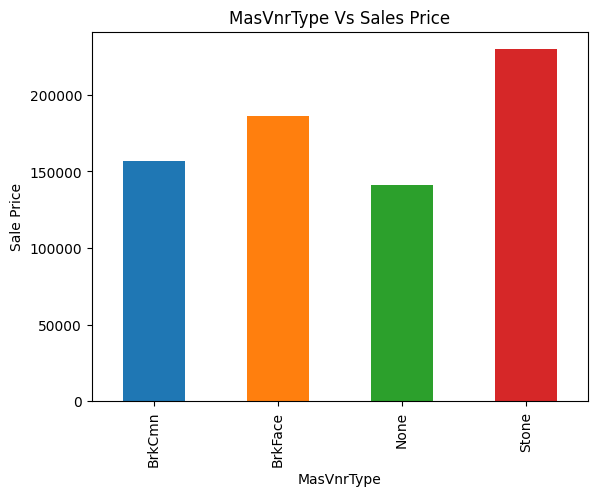

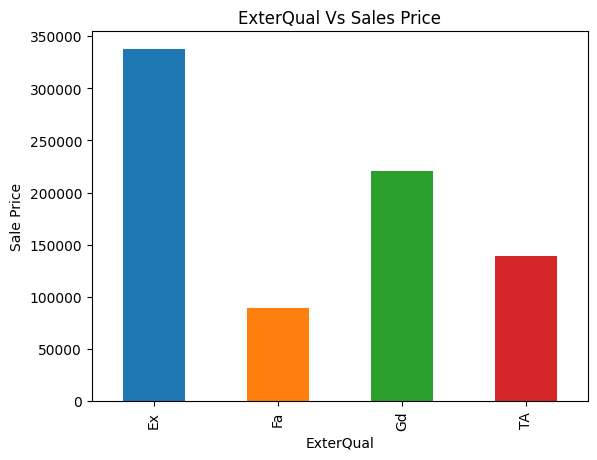

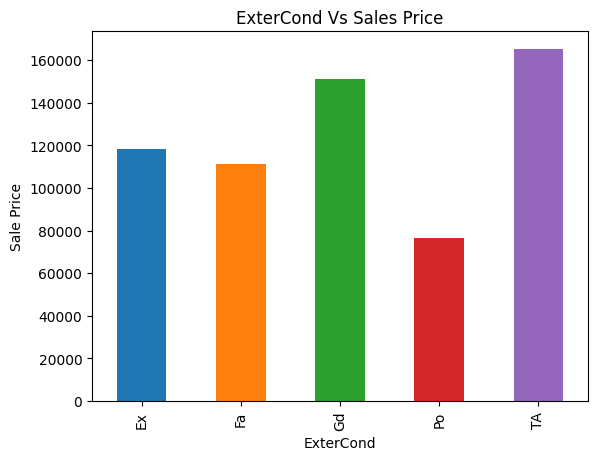

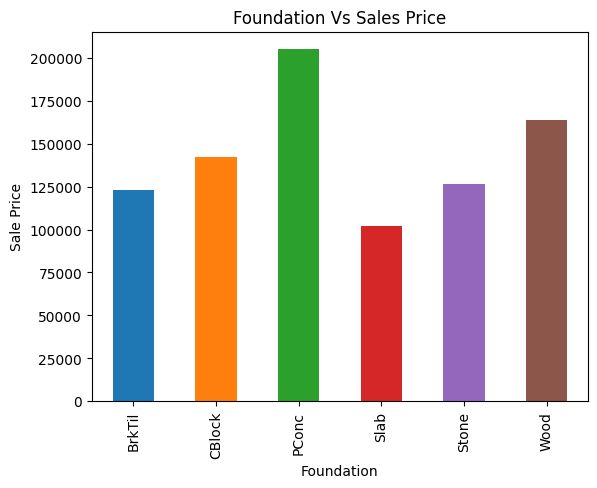

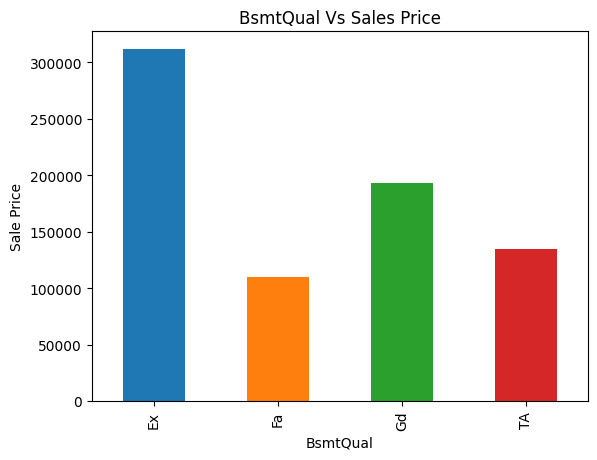

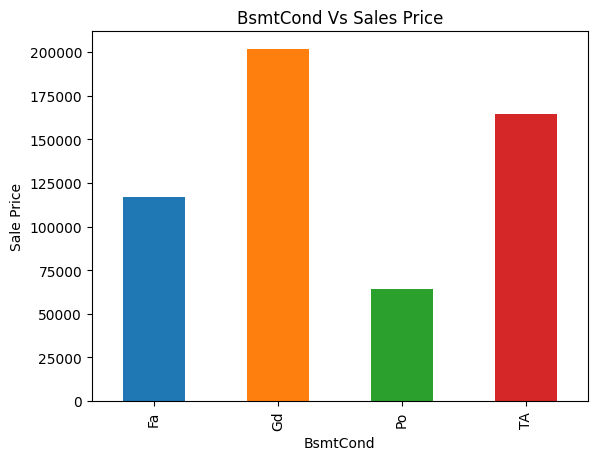

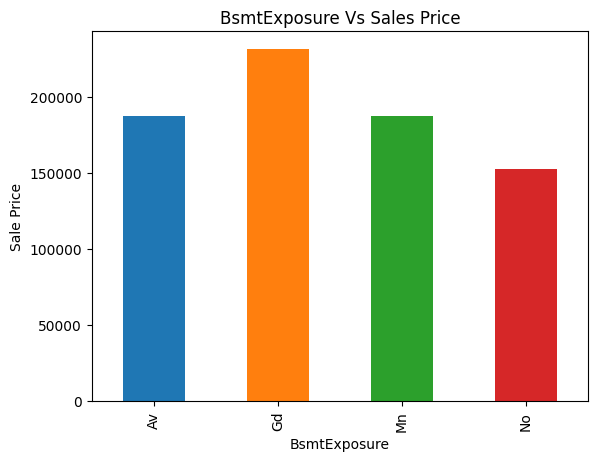

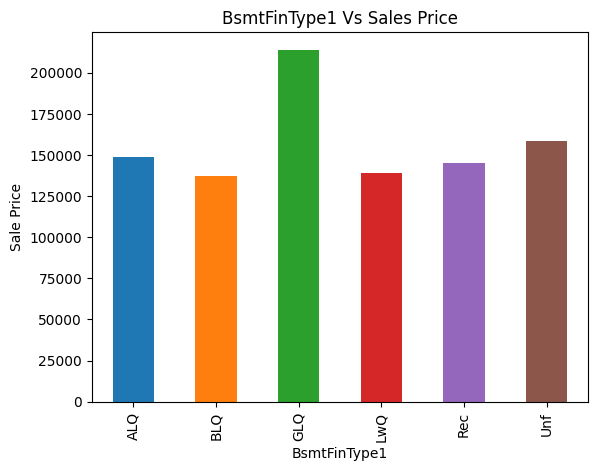

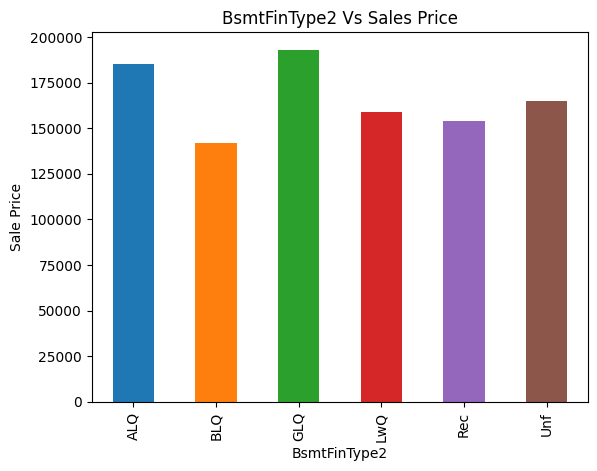

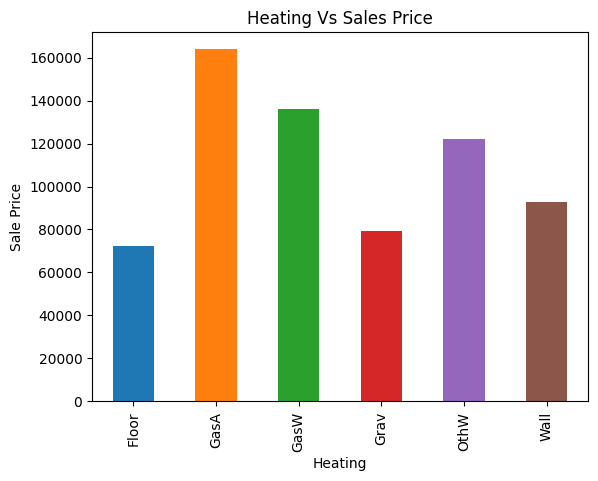

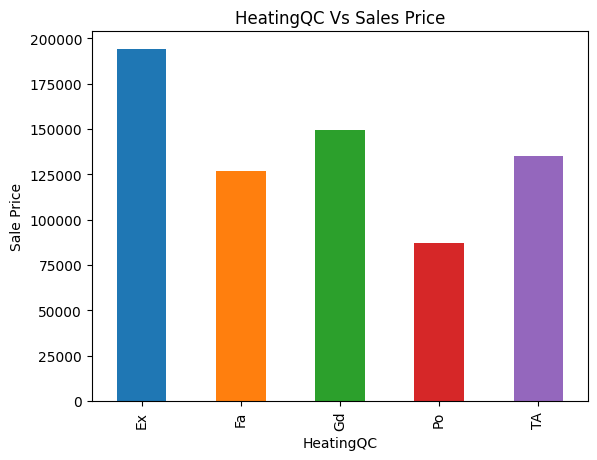

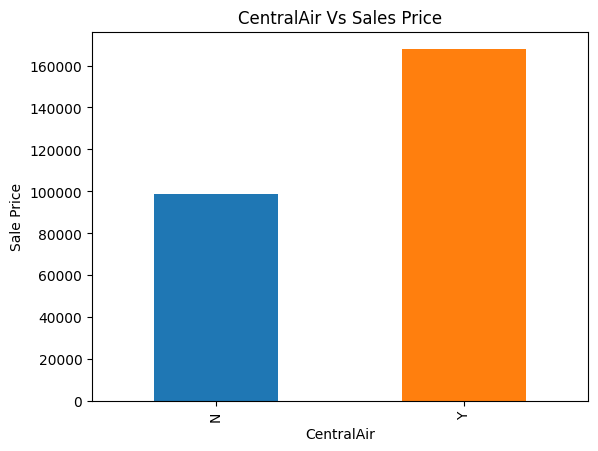

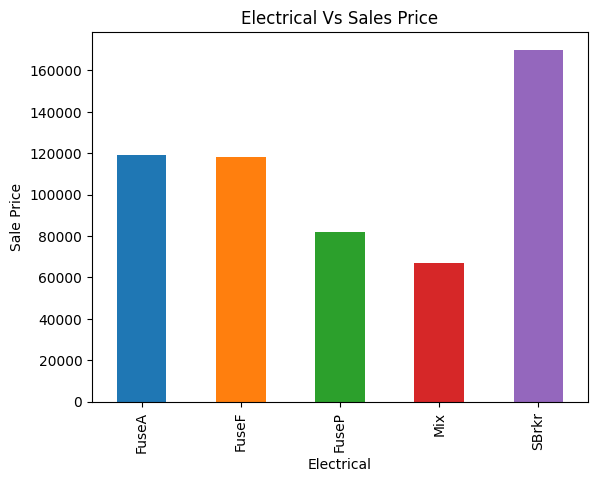

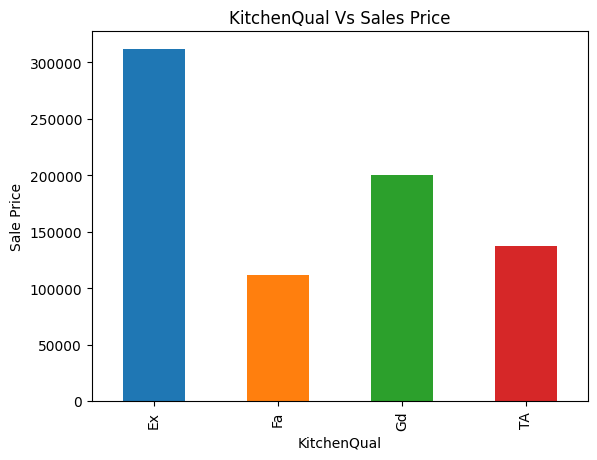

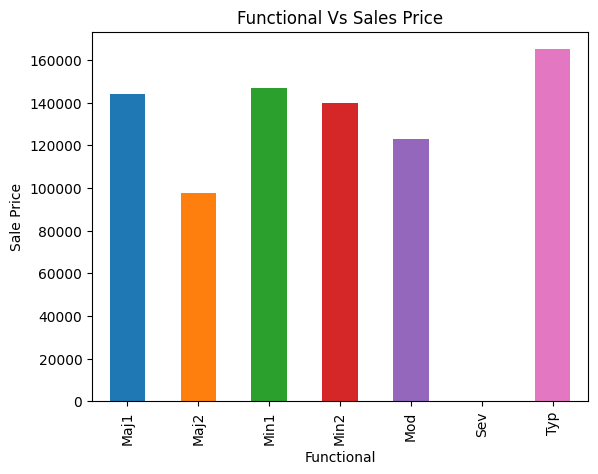

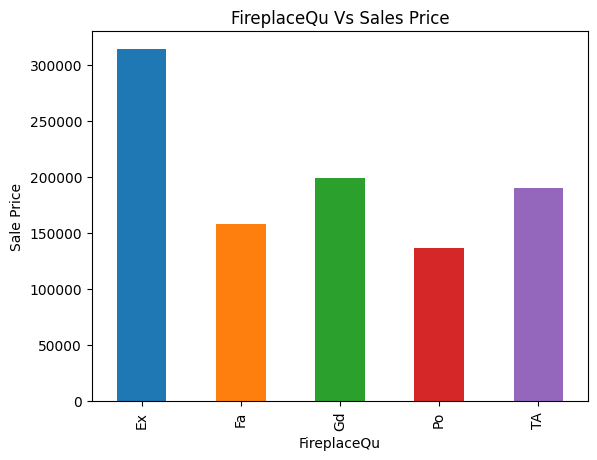

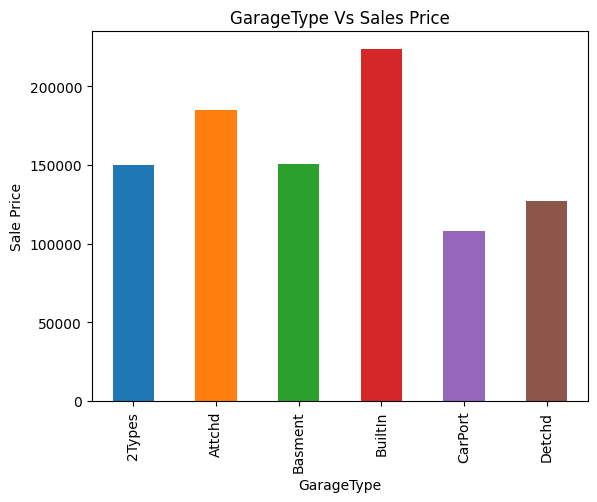

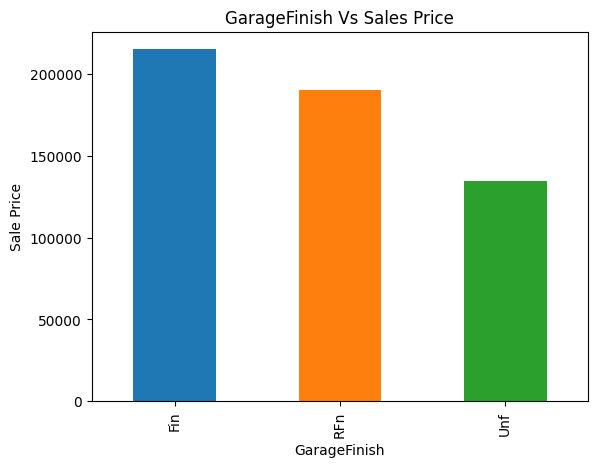

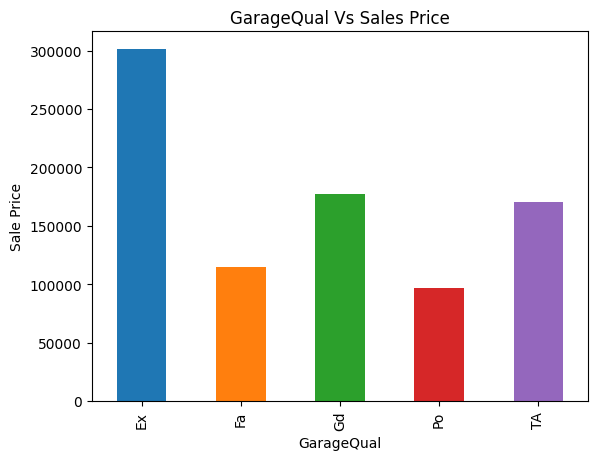

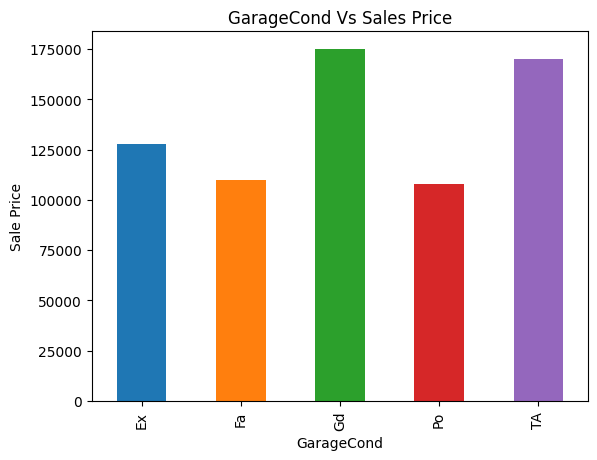

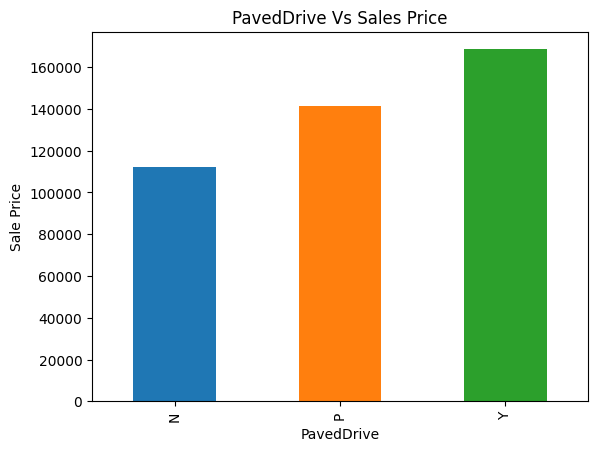

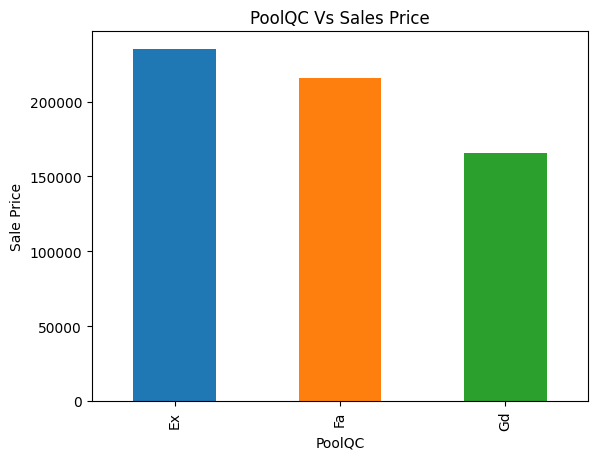

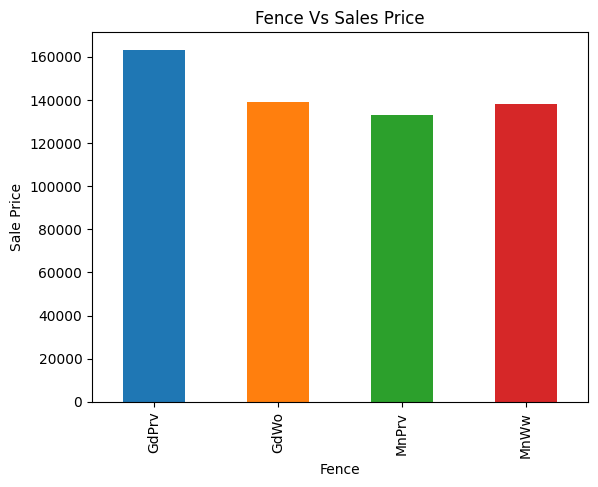

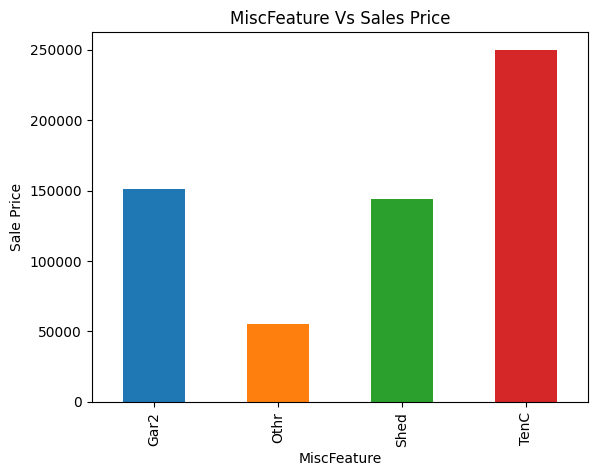

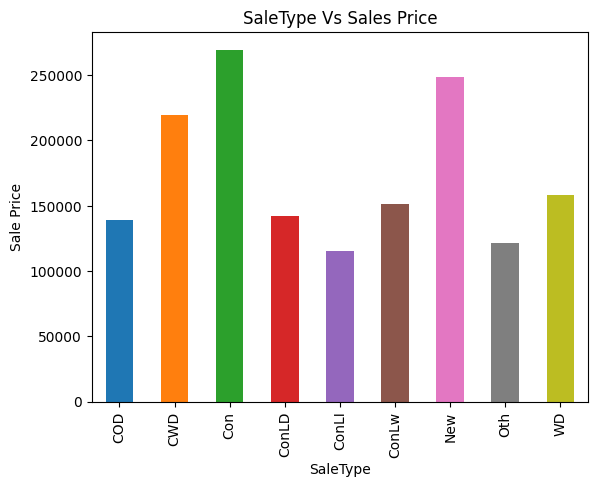

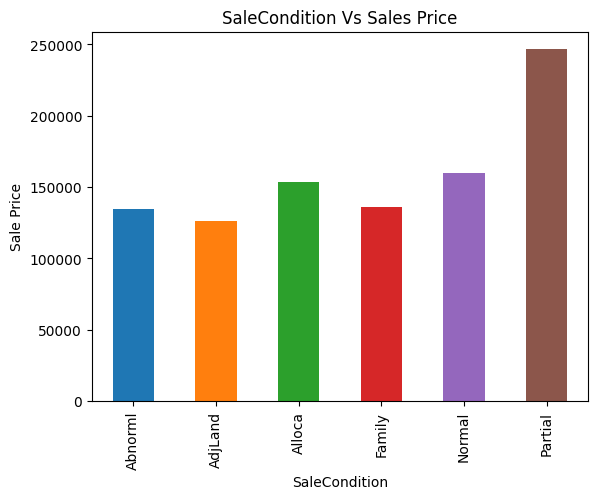

In [ ]:
#Relationship between categorical feature and dependent feature - SalePrice
for feature in categorical_feature:
  df1 = df.copy()
  df1.groupby(feature)['SalePrice'].median().plot.bar(color = custom_colors)
  plt.xlabel(feature)
  plt.ylabel('Sale Price')
  plt.title(feature + ' Vs Sales Price')
  plt.show()

# Feature Engineering

Modifications will be done to the following parameters in the dataset:
1.  Missing Values
2.  Temporal Values
3.  Categorical Values with rare labels
4.  Convert NaN values to something meaningful
5.  standardize the values of the feature to the same range

In [ ]:
#Missing Values in Categorical Features.
categorical_feature_nan = [feature for feature in df.columns if df[feature].isnull().sum()>1 and df[feature].dtype =='O']
# Percentage of Missing values in each Feature
for feature in categorical_feature_nan:
  print('{} : {}% Missing values'.format(feature,np.round(df[feature].isnull().mean(),4)))

Alley : 0.9378% Missing values
MasVnrType : 0.0055% Missing values
BsmtQual : 0.0249% Missing values
BsmtCond : 0.0249% Missing values
BsmtExposure : 0.0256% Missing values
BsmtFinType1 : 0.0249% Missing values
BsmtFinType2 : 0.0256% Missing values
FireplaceQu : 0.4737% Missing values
GarageType : 0.0539% Missing values
GarageFinish : 0.0539% Missing values
GarageQual : 0.0539% Missing values
GarageCond : 0.0539% Missing values
PoolQC : 0.9959% Missing values
Fence : 0.8084% Missing values
MiscFeature : 0.9627% Missing values


In [ ]:
#Replacing Missing Values in categorical feature with New Label :"Missing"
def replace_cat_feature(dataset,feature_nan):
  df1 = df.copy()
  df1[feature_nan]=df[feature_nan].fillna('Missing')
  return df1

df = replace_cat_feature(df,categorical_feature_nan)
df[categorical_feature_nan].isnull().sum()

Alley           0
MasVnrType      0
BsmtQual        0
BsmtCond        0
BsmtExposure    0
BsmtFinType1    0
BsmtFinType2    0
FireplaceQu     0
GarageType      0
GarageFinish    0
GarageQual      0
GarageCond      0
PoolQC          0
Fence           0
MiscFeature     0
dtype: int64

In [ ]:
numerical_feature_nan = [feature for feature in df.columns if df[feature].isnull().sum()>1 and df[feature].dtypes !=  'O']
for feature in numerical_feature_nan:
  print('{} : {}% missing value'.format(feature, np.round(df[feature].isnull().mean(),4)))

LotFrontage : 0.1791% missing value
MasVnrArea : 0.0055% missing value
GarageYrBlt : 0.0539% missing value
SalePrice : 0.3084% missing value


In [ ]:
#Replacing Numerical Missing Values with Median and creating new columns for Numerical features for which median was added
for feature in numerical_feature_nan:
  #Using Median because there are many outliers in the data.
  median_value = df[feature].median()

  #Creating a new_feature to keep track of NaN Values
  df[feature+'nan'] = np.where(df[feature].isnull(),1,0)
  df[feature].fillna(median_value, inplace = True)

#Checking if the changes have been applied:
df[numerical_feature_nan].isnull().sum()

LotFrontage    0
MasVnrArea     0
GarageYrBlt    0
SalePrice      0
dtype: int64

In [ ]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,LotFrontagenan,MasVnrAreanan,GarageYrBltnan,SalePricenan
0,149,20,RL,63.0,7500,Pave,Missing,Reg,Lvl,AllPub,Inside,Gtl,SawyerW,Norm,Norm,1Fam,1Story,7,5,2004,2005,Gable,CompShg,VinylSd,VinylSd,BrkFace,120.0,TA,TA,PConc,Gd,TA,No,GLQ,680,Unf,0,400,1080,GasA,Ex,Y,SBrkr,1080,0,0,1080,1,0,1,0,3,1,Gd,6,Typ,0,Missing,Missing,1979.5,Missing,0,0,Missing,Missing,Y,0,0,0,0,0,0,Missing,Missing,Missing,0,4,2008,WD,Normal,141000.0,0,0,1,0
1,460,50,RL,69.0,7015,Pave,Missing,IR1,Bnk,AllPub,Corner,Gtl,BrkSide,Norm,Norm,1Fam,1.5Fin,5,4,1950,1950,Gable,CompShg,MetalSd,MetalSd,BrkCmn,161.0,TA,TA,CBlock,TA,TA,No,LwQ,185,Unf,0,524,709,GasA,TA,Y,SBrkr,979,224,0,1203,1,0,1,0,3,1,Gd,5,Typ,1,TA,Detchd,1950.0,Unf,1,352,TA,TA,Y,0,0,248,0,0,0,Missing,Missing,Missing,0,7,2009,WD,Normal,110000.0,1,0,0,0
2,1336,20,RL,80.0,9650,Pave,Missing,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,1Fam,1Story,6,5,1977,1977,Gable,CompShg,Plywood,Plywood,BrkFace,360.0,TA,TA,CBlock,Gd,TA,No,ALQ,686,Unf,0,664,1350,GasA,TA,Y,SBrkr,1334,0,0,1334,0,1,2,0,2,1,TA,6,Typ,1,TA,Attchd,1977.0,RFn,2,630,TA,TA,Y,0,16,0,0,0,0,Missing,Missing,Missing,0,4,2009,WD,Normal,167900.0,0,0,0,0
3,805,20,RL,75.0,9000,Pave,Missing,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,5,1954,1954,Gable,CompShg,Wd Sdng,Wd Sdng,None,0.0,TA,TA,CBlock,TA,TA,No,LwQ,812,Unf,0,124,936,GasA,TA,Y,SBrkr,1128,0,0,1128,0,0,1,0,2,1,TA,5,Min1,0,Missing,Attchd,1954.0,Unf,1,286,TA,TA,Y,0,0,0,0,0,0,Missing,GdWo,Missing,0,6,2006,WD,Family,118000.0,0,0,0,0
4,1396,60,RL,88.0,12665,Pave,Missing,IR1,Lvl,AllPub,Inside,Gtl,Timber,Norm,Norm,1Fam,2Story,8,5,2005,2006,Hip,CompShg,VinylSd,VinylSd,BrkFace,245.0,Gd,TA,PConc,Gd,Gd,Gd,Unf,0,Unf,0,1094,1094,GasA,Ex,Y,SBrkr,1133,1349,0,2482,0,0,2,1,4,1,Gd,9,Typ,1,Gd,BuiltIn,2005.0,Fin,3,642,TA,TA,Y,144,39,0,0,0,0,Missing,Missing,Missing,0,2,2007,WD,Normal,281213.0,0,0,0,0


In [ ]:
#Temporal Variables
#subtracting Year Built, Year Remodification and Garage Year Built from Year the house was sold
for feature in['YearBuilt','YearRemodAdd','GarageYrBlt']:
  df[feature] = df['YrSold'] - df[feature]
df[['YearBuilt','YearRemodAdd','GarageYrBlt']].head()

,YearBuilt,YearRemodAdd,GarageYrBlt
0,4,3,28.5
1,59,59,59.0
2,32,32,32.0
3,52,52,52.0
4,2,1,2.0



#Numerical Value

In [ ]:
#The values present in the dataset are inclined positive and have a normal distribution for some variables.
import numpy as np
num_features=['LotFrontage', 'LotArea', '1stFlrSF', 'GrLivArea', 'SalePrice']

for feature in num_features:
    df[feature]=np.log(df[feature])


In [ ]:
#categorical_feature
for feature in categorical_feature:
  temp = df.groupby(feature)['SalePrice'].count()/len(df)
  temp_df = temp[temp > 0.01].index
  df[feature] = np.where(df[feature].isin(temp_df),df[feature],'rare_var')



In [ ]:
for feature in categorical_feature:
    labels_ordered = df.groupby([feature])['SalePrice'].mean().sort_values().index
    labels_ordered = {k: i for i, k in enumerate(labels_ordered, 0)}
    df[feature] = df[feature].map(labels_ordered)


In [ ]:
df.head(15)
len(df.columns)

85

In [ ]:
scaling_feature = [feature for feature in df.columns if feature not in ['Id','SalePrice']]
scaling_feature

['MSSubClass',
 'MSZoning',
 'LotFrontage',
 'LotArea',
 'Street',
 'Alley',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'MasVnrArea',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinSF1',
 'BsmtFinType2',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'KitchenQual',
 'TotRmsAbvGrd',
 'Functional',
 'Fireplaces',
 'FireplaceQu',
 'GarageType',
 'GarageYrBlt',
 'GarageFinish',
 'GarageCars',
 'GarageArea',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'WoodDeckSF',
 'OpenPorchSF',
 'Enc

###MinMaxScaler is imported from scikit-learn, and it is actively initialized as 'scaler' before being fitted to the 'scaling_feature' subset of data to scale the features to a specified range (typically between 0 and 1)

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
scaler.fit(df[scaling_feature])

MinMaxScaler()

In [ ]:
scaler.transform(df[scaling_feature])

array([[0.        , 0.75      , 0.40664031, ..., 0.        , 1.        ,
        0.        ],
       [0.17647059, 0.75      , 0.4403126 , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.75      , 0.49506375, ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.29411765, 0.75      , 0.42385922, ..., 0.        , 0.        ,
        1.        ],
       [0.        , 0.75      , 0.434909  , ..., 0.        , 0.        ,
        1.        ],
       [0.        , 0.75      , 0.47117546, ..., 0.        , 0.        ,
        1.        ]])

In [ ]:
# transform the train and test set, and add on the Id and SalePrice variables
final_df = pd.concat([df[['Id', 'SalePrice']].reset_index(drop=True), pd.DataFrame(scaler.transform(df[scaling_feature]), columns=scaling_feature)], axis=1)

In [ ]:
final_df.head()

,Id,SalePrice,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,LotFrontagenan,MasVnrAreanan,GarageYrBltnan,SalePricenan
0,149,11.856515,0.000000,0.75,0.406640,0.343002,1.0,1.0,0.000000,0.333333,1.0,0.25,0.0,0.454545,0.6,1.0,0.75,0.8,0.666667,0.500,0.029412,0.065574,0.0,0.0,1.0,1.0,0.50,0.075000,0.333333,1.0,1.0,0.75,0.75,0.25,1.000000,0.120482,0.833333,0.0,0.171233,0.176759,1.0,1.0,1.0,1.0,0.420489,0.000000,0.0,0.353121,0.333333,0.0,0.333333,0.0,0.375,0.333333,0.666667,0.272727,1.000000,0.000000,0.2,0.0,0.266355,0.000000,0.00,0.000000,0.0,0.0,1.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.75,1.0,0.0,0.272727,0.50,0.666667,0.75,0.0,0.0,1.0,0.0
1,460,11.608236,0.176471,0.75,0.440313,0.329918,1.0,1.0,0.333333,0.000000,1.0,0.00,0.0,0.227273,0.6,1.0,0.75,0.0,0.444444,0.375,0.433824,0.983607,0.0,0.0,0.4,0.4,0.25,0.100625,0.333333,1.0,0.5,0.50,0.75,0.25,0.333333,0.032778,0.833333,0.0,0.224315,0.116039,1.0,0.5,1.0,1.0,0.381753,0.123212,0.0,0.395322,0.333333,0.0,0.333333,0.0,0.375,0.333333,0.666667,0.181818,1.000000,0.333333,0.6,0.4,0.551402,0.333333,0.25,0.248237,1.0,1.0,1.0,0.000000,0.000000,0.449275,0.0,0.0,0.0,0.0,0.75,1.0,0.0,0.545455,0.75,0.666667,0.75,1.0,0.0,0.0,0.0
2,1336,12.031124,0.000000,0.75,0.495064,0.392333,1.0,1.0,0.000000,0.333333,1.0,0.25,0.0,0.545455,0.6,1.0,0.75,0.8,0.555556,0.500,0.235294,0.540984,0.0,0.0,0.7,0.7,0.50,0.225000,0.333333,1.0,0.5,0.75,0.75,0.25,0.666667,0.121545,0.833333,0.0,0.284247,0.220949,1.0,0.5,1.0,1.0,0.503820,0.000000,0.0,0.435765,0.000000,0.5,0.666667,0.0,0.250,0.333333,0.333333,0.272727,1.000000,0.333333,0.6,0.8,0.299065,0.666667,0.50,0.444288,1.0,1.0,1.0,0.000000,0.029250,0.000000,0.0,0.0,0.0,0.0,0.75,1.0,0.0,0.272727,0.75,0.666667,0.75,0.0,0.0,0.0,0.0
3,805,11.678440,0.000000,0.75,0.471175,0.378685,1.0,1.0,0.000000,0.333333,1.0,0.25,0.0,0.318182,0.6,1.0,0.75,0.8,0.444444,0.500,0.382353,0.868852,0.0,0.0,0.3,0.1,0.00,0.000000,0.333333,1.0,0.5,0.50,0.75,0.25,0.333333,0.143870,0.833333,0.0,0.053082,0.153191,1.0,0.5,1.0,1.0,0.437645,0.000000,0.0,0.370135,0.000000,0.0,0.333333,0.0,0.250,0.333333,0.333333,0.181818,0.666667,0.000000,0.2,0.8,0.485981,0.333333,0.25,0.201693,1.0,1.0,1.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.00,1.0,0.0,0.454545,0.00,0.666667,0.25,0.0,0.0,0.0,0.0
4,1396,12.546868,0.235294,0.75,0.530342,0.445546,1.0,1.0,0.333333,0.333333,1.0,0.25,0.0,0.863636,0.6,1.0,0.75,1.0,0.777778,0.500,0.014706,0.032787,1.0,0.0,1.0,1.0,0.50,0.153125,0.666667,1.0,1.0,0.75,1.00,1.00,0.833333,0.000000,0.833333,0.0,0.468322,0.179051,1.0,1.0,1.0,1.0,0.439390,0.742024,0.0,0.678699,0.000000,0.0,0.666667,0.5,0.500,0.333333,0.666667,0.545455,1.000000,0.333333,0.8,1.0,0.018692,1.000000,0.75,0.452750,1.0,1.0,1.0,0.168028,0.071298,0.000000,0.0,0.0,0.0,0.0,0.75,1.0,0.0,0.090909,0.25,0.666667,0.75,0.0,0.0,0.0,0.0


#Splitting Train and Test Data

In [ ]:
processed_train_df = final_df.iloc[:1000]
processed_test_df = final_df.iloc[1000:]
print(processed_train_df.shape)
print(processed_test_df.shape)

(1000, 85)
(446, 85)


#Feature Selection

In [ ]:
from sklearn.linear_model import Lasso
from sklearn.feature_selection import SelectFromModel
processed_train_df.head()

,Id,SalePrice,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,LotFrontagenan,MasVnrAreanan,GarageYrBltnan,SalePricenan
0,149,11.856515,0.000000,0.75,0.406640,0.343002,1.0,1.0,0.000000,0.333333,1.0,0.25,0.0,0.454545,0.6,1.0,0.75,0.8,0.666667,0.500,0.029412,0.065574,0.0,0.0,1.0,1.0,0.50,0.075000,0.333333,1.0,1.0,0.75,0.75,0.25,1.000000,0.120482,0.833333,0.0,0.171233,0.176759,1.0,1.0,1.0,1.0,0.420489,0.000000,0.0,0.353121,0.333333,0.0,0.333333,0.0,0.375,0.333333,0.666667,0.272727,1.000000,0.000000,0.2,0.0,0.266355,0.000000,0.00,0.000000,0.0,0.0,1.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.75,1.0,0.0,0.272727,0.50,0.666667,0.75,0.0,0.0,1.0,0.0
1,460,11.608236,0.176471,0.75,0.440313,0.329918,1.0,1.0,0.333333,0.000000,1.0,0.00,0.0,0.227273,0.6,1.0,0.75,0.0,0.444444,0.375,0.433824,0.983607,0.0,0.0,0.4,0.4,0.25,0.100625,0.333333,1.0,0.5,0.50,0.75,0.25,0.333333,0.032778,0.833333,0.0,0.224315,0.116039,1.0,0.5,1.0,1.0,0.381753,0.123212,0.0,0.395322,0.333333,0.0,0.333333,0.0,0.375,0.333333,0.666667,0.181818,1.000000,0.333333,0.6,0.4,0.551402,0.333333,0.25,0.248237,1.0,1.0,1.0,0.000000,0.000000,0.449275,0.0,0.0,0.0,0.0,0.75,1.0,0.0,0.545455,0.75,0.666667,0.75,1.0,0.0,0.0,0.0
2,1336,12.031124,0.000000,0.75,0.495064,0.392333,1.0,1.0,0.000000,0.333333,1.0,0.25,0.0,0.545455,0.6,1.0,0.75,0.8,0.555556,0.500,0.235294,0.540984,0.0,0.0,0.7,0.7,0.50,0.225000,0.333333,1.0,0.5,0.75,0.75,0.25,0.666667,0.121545,0.833333,0.0,0.284247,0.220949,1.0,0.5,1.0,1.0,0.503820,0.000000,0.0,0.435765,0.000000,0.5,0.666667,0.0,0.250,0.333333,0.333333,0.272727,1.000000,0.333333,0.6,0.8,0.299065,0.666667,0.50,0.444288,1.0,1.0,1.0,0.000000,0.029250,0.000000,0.0,0.0,0.0,0.0,0.75,1.0,0.0,0.272727,0.75,0.666667,0.75,0.0,0.0,0.0,0.0
3,805,11.678440,0.000000,0.75,0.471175,0.378685,1.0,1.0,0.000000,0.333333,1.0,0.25,0.0,0.318182,0.6,1.0,0.75,0.8,0.444444,0.500,0.382353,0.868852,0.0,0.0,0.3,0.1,0.00,0.000000,0.333333,1.0,0.5,0.50,0.75,0.25,0.333333,0.143870,0.833333,0.0,0.053082,0.153191,1.0,0.5,1.0,1.0,0.437645,0.000000,0.0,0.370135,0.000000,0.0,0.333333,0.0,0.250,0.333333,0.333333,0.181818,0.666667,0.000000,0.2,0.8,0.485981,0.333333,0.25,0.201693,1.0,1.0,1.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.00,1.0,0.0,0.454545,0.00,0.666667,0.25,0.0,0.0,0.0,0.0
4,1396,12.546868,0.235294,0.75,0.530342,0.445546,1.0,1.0,0.333333,0.333333,1.0,0.25,0.0,0.863636,0.6,1.0,0.75,1.0,0.777778,0.500,0.014706,0.032787,1.0,0.0,1.0,1.0,0.50,0.153125,0.666667,1.0,1.0,0.75,1.00,1.00,0.833333,0.000000,0.833333,0.0,0.468322,0.179051,1.0,1.0,1.0,1.0,0.439390,0.742024,0.0,0.678699,0.000000,0.0,0.666667,0.5,0.500,0.333333,0.666667,0.545455,1.000000,0.333333,0.8,1.0,0.018692,1.000000,0.75,0.452750,1.0,1.0,1.0,0.168028,0.071298,0.000000,0.0,0.0,0.0,0.0,0.75,1.0,0.0,0.090909,0.25,0.666667,0.75,0.0,0.0,0.0,0.0


#Modeling and Prediction

In [ ]:
## Capture the dependent feature
y_train=processed_train_df[['SalePrice']]

In [ ]:
## drop dependent feature from dataset
X_train=processed_train_df.drop(['Id','SalePrice'],axis=1)

In [ ]:
feature_sel_model = SelectFromModel(Lasso(alpha=0.005, random_state=0))
feature_sel_model.fit(X_train, y_train)

SelectFromModel(estimator=Lasso(alpha=0.005, random_state=0))

In [ ]:
feature_sel_model

SelectFromModel(estimator=Lasso(alpha=0.005, random_state=0))

In [ ]:
feature_sel_model.get_support()

array([ True, False, False, False, False, False, False, False, False,
       False, False,  True, False, False, False, False,  True, False,
       False,  True,  True, False, False, False, False, False, False,
       False,  True,  True, False,  True, False, False, False, False,
       False, False, False, False,  True, False,  True, False, False,
        True,  True, False, False, False, False, False,  True, False,
       False,  True,  True,  True, False,  True,  True, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False,  True, False, False,
       False, False])

###The feature selection model is used to filter only those columns with True values that will be used in the prediction model.

In [ ]:
selected_feat = X_train.columns[(feature_sel_model.get_support())]

# let's print some stats
print('total features: {}'.format((X_train.shape[1])))
print('selected features: {}'.format(len(selected_feat)))
# print('features with coefficients shrank to zero: {}'.format(
#     np.sum(sel_.estimator_.coef_ == 0)))

total features: 83
selected features: 19


#X_Train with Selected Features.

In [ ]:
X_train=X_train[selected_feat]
print(X_train.shape)
X_train.head()

(1000, 19)


,MSSubClass,Neighborhood,OverallQual,YearRemodAdd,RoofStyle,Foundation,BsmtQual,BsmtExposure,CentralAir,1stFlrSF,GrLivArea,BsmtFullBath,KitchenQual,Fireplaces,FireplaceQu,GarageType,GarageFinish,GarageCars,SaleCondition
0,0.000000,0.454545,0.666667,0.065574,0.0,1.0,0.75,0.25,1.0,0.420489,0.353121,0.333333,0.666667,0.000000,0.2,0.0,0.000000,0.00,0.75
1,0.176471,0.227273,0.444444,0.983607,0.0,0.5,0.50,0.25,1.0,0.381753,0.395322,0.333333,0.666667,0.333333,0.6,0.4,0.333333,0.25,0.75
2,0.000000,0.545455,0.555556,0.540984,0.0,0.5,0.75,0.25,1.0,0.503820,0.435765,0.000000,0.333333,0.333333,0.6,0.8,0.666667,0.50,0.75
3,0.000000,0.318182,0.444444,0.868852,0.0,0.5,0.50,0.25,1.0,0.437645,0.370135,0.000000,0.333333,0.000000,0.2,0.8,0.333333,0.25,0.25
4,0.235294,0.863636,0.777778,0.032787,1.0,1.0,0.75,1.00,1.0,0.439390,0.678699,0.000000,0.666667,0.333333,0.8,1.0,1.000000,0.75,0.75


In [ ]:
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
X = X_train
y = y_train

model = LinearRegression()
model.fit(X,y)

LinearRegression()

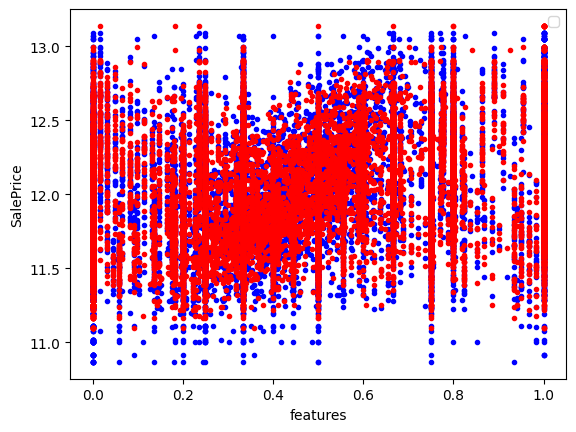

In [ ]:
 plt.xlabel("features")
plt.ylabel("SalePrice")

predictions = model.predict(X)
plt.plot(X,y,'b.')
plt.plot(X,predictions,'r.')
plt.legend()

In [ ]:
#Keeping the common columns
common_columns = X_train.columns.intersection(processed_test_df.columns)
processed_test_df = processed_test_df[common_columns]
processed_test_df.shape

#Predict on the test set
#test_df = pd.read_csv('Housing_Data_Test.csv')
m = processed_test_df
predictions = model.predict(m)

#Test data is provided to the trained linear regression model.

In [ ]:
prediction_list = predictions.tolist()
real_values = np.exp(prediction_list)
rounded_list_predictions = [int(x) for x in real_values]
print(rounded_list_predictions)
print(len(rounded_list_predictions))

[180728, 145416, 109116, 152097, 122444, 257075, 68498, 165626, 146632, 140508, 143408, 284268, 205924, 171999, 154353, 395357, 119681, 171783, 218156, 91470, 119329, 188301, 175563, 189277, 106325, 123401, 199831, 167767, 180701, 130912, 102990, 148612, 315207, 215201, 162301, 180925, 82854, 143576, 199342, 213746, 155105, 161258, 198739, 136200, 147993, 114156, 114828, 222890, 256788, 162844, 243214, 149957, 123267, 210273, 171792, 175146, 127540, 175834, 155568, 124114, 121259, 149371, 148742, 141990, 208433, 220276, 191665, 208173, 247662, 97058, 189371, 249067, 109966, 232511, 158056, 204538, 97230, 190256, 99282, 172461, 120094, 150369, 241256, 241577, 113131, 221915, 248657, 125469, 229101, 175207, 164150, 193721, 335894, 144555, 152317, 99796, 136770, 214866, 140144, 103824, 202186, 150164, 277553, 143248, 104243, 116529, 212939, 133502, 261885, 351087, 220445, 210461, 107378, 125281, 105322, 135034, 146543, 215747, 248410, 297244, 214850, 192630, 315311, 141945, 106025, 197509

In [ ]:
def my_answer_list():
  return [180728, 145416, 109116, 152097, 122444, 257075, 68498, 165626, 146632, 140508, 143408, 284268, 205924, 171999, 154353, 395357, 119681, 171783, 218156, 91470, 119329, 188301, 175563, 189277, 106325, 123401, 199831, 167767, 180701, 130912, 102990, 148612, 315207, 215201, 162301, 180925, 82854, 143576, 199342, 213746, 155105, 161258, 198739, 136200, 147993, 114156, 114828, 222890, 256788, 162844, 243214, 149957, 123267, 210273, 171792, 175146, 127540, 175834, 155568, 124114, 121259, 149371, 148742, 141990, 208433, 220276, 191665, 208173, 247662, 97058, 189371, 249067, 109966, 232511, 158056, 204538, 97230, 190256, 99282, 172461, 120094, 150369, 241256, 241577, 113131, 221915, 248657, 125469, 229101, 175207, 164150, 193721, 335894, 144555, 152317, 99796, 136770, 214866, 140144, 103824, 202186, 150164, 277553, 143248, 104243, 116529, 212939, 133502, 261885, 351087, 220445, 210461, 107378, 125281, 105322, 135034, 146543, 215747, 248410, 297244, 214850, 192630, 315311, 141945, 106025, 197509, 213906, 117744, 188006, 124481, 211228, 167646, 244834, 161670, 111150, 181736, 196728, 126443, 361921, 130226, 90170, 167729, 130803, 347458, 162306, 117195, 209181, 135240, 229106, 145602, 211581, 149304, 127471, 153808, 138998, 371654, 213102, 142817, 400995, 109837, 243119, 230256, 130177, 148233, 115814, 127604, 283978, 117868, 112920, 185876, 134652, 262067, 140213, 142670, 126425, 148590, 230299, 119024, 242374, 105609, 390851, 126780, 152519, 126802, 219358, 131567, 121292, 138219, 118666, 118878, 161047, 297160, 155457, 141523, 161827, 77205, 204454, 332009, 194415, 168376, 154122, 123180, 143416, 306365, 123114, 218182, 154317, 159723, 303935, 101357, 132156, 125423, 122831, 309824, 158379, 218269, 228297, 102368, 84962, 96605, 169474, 180071, 259178, 151286, 250503, 202575, 137863, 154567, 220608, 171898, 127138, 256320, 224003, 115436, 129836, 146968, 171655, 156337, 227589, 174011, 255288, 204886, 163113, 148173, 95131, 211096, 219012, 140011, 102010, 203145, 164248, 191454, 154520, 148051, 135567, 182167, 160059, 167152, 148855, 128629, 100427, 182473, 127925, 304939, 223718, 139448, 143438, 124322, 133018, 151510, 173962, 80132, 146355, 133766, 257828, 138558, 90368, 167948, 174551, 155141, 150650, 219979, 246258, 295625, 98336, 182128, 283914, 130852, 120148, 159504, 144886, 116940, 171097, 85377, 121736, 207408, 241306, 191857, 181796, 170012, 152719, 211922, 124472, 176779, 179209, 141631, 303582, 133020, 296057, 224823, 81176, 232159, 275825, 127019, 157688, 197517, 170347, 247383, 161483, 218974, 99535, 171499, 135153, 123908, 127031, 168365, 156698, 205161, 172332, 160438, 180982, 123191, 112194, 61067, 113665, 331589, 135664, 205716, 133399, 225999, 94097, 181217, 219352, 124348, 173349, 206406, 337904, 146024, 142191, 206434, 158107, 217374, 124898, 140107, 129195, 196767, 156868, 181409, 170173, 232450, 140951, 96213, 206189, 240254, 219693, 272863, 149339, 207758, 133328, 132858, 180862, 141275, 157769, 200396, 135969, 210367, 251028, 205058, 139952, 115576, 234925, 153230, 257594, 178464, 165219, 97077, 144281, 136745, 120157, 143692, 309633, 313804, 208938, 139743, 174855, 201920, 113071, 198078, 260548, 106525, 76195, 255439, 112486, 151274, 127164, 233603, 195729, 217628, 221304, 192245, 367707, 197982, 146344, 168685, 180864, 116529, 253194, 185010, 239358, 104118, 87602, 123052, 306878, 125520, 125065, 158624, 182079, 205727, 249768, 131659, 90308, 313178, 181141, 146608, 181544, 194427, 349753, 329780, 103716, 80279, 258882, 175684, 220497, 224550, 143506, 134108]



#Final RMSE Score for the above Model is **24459**

#OVERFITTING VS UNDERFITTING

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error
from google.colab import files
training_data = files.upload()  #Upload Housing_Data_Train.csv

# Load the Ames Housing Dataset (you may need to adjust the file path)
train_data = 'Housing_Data_Train.csv'
data = pd.read_csv(train_data)

Saving Housing_Data_Train.csv to Housing_Data_Train (3).csv


#Over Fitting

Mean Squared Error: 4209782374.48
R-squared: 0.18


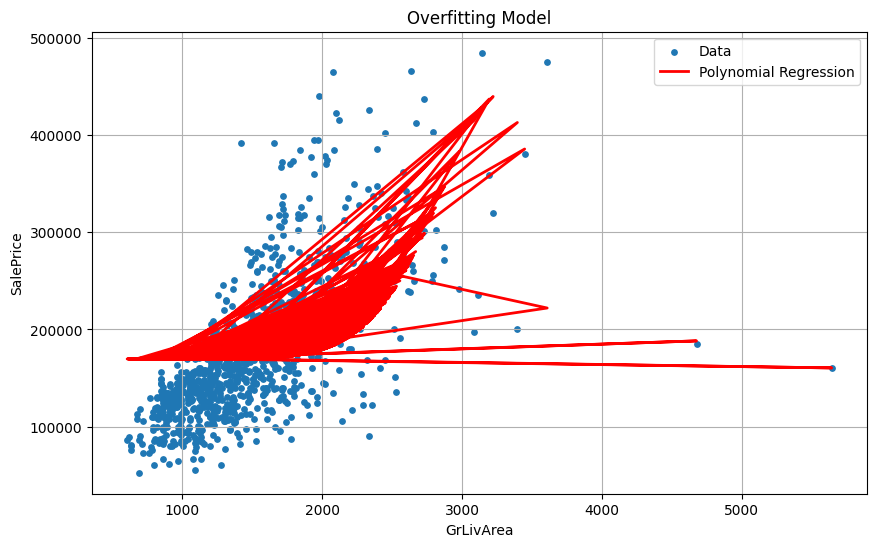

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# # Load the Ames Housing Dataset (you may need to adjust the file path)
# data = pd.read_csv('Ames_Housing_Dataset.csv')

# Select features and target variable
X = data[['GrLivArea']]
y = data['SalePrice']

# Create a high-degree polynomial transformation
degree = 15  # High-degree polynomial
poly = PolynomialFeatures(degree)
X_poly = poly.fit_transform(X)

# Fit a polynomial regression model
model = LinearRegression()
model.fit(X_poly, y)

# Make predictions on the training data
y_pred = model.predict(X_poly)

# Calculate mean squared error and R-squared
mse = mean_squared_error(y, y_pred)
r2 = r2_score(y, y_pred)

# Print model performance metrics
print(f"Mean Squared Error: {mse:.2f}")
print(f"R-squared: {r2:.2f}")

# Plot the data points and the polynomial regression curve
plt.figure(figsize=(10, 6))
plt.scatter(X, y, s=15, label='Data')
plt.plot(X, y_pred, color='red', label='Polynomial Regression', linewidth=2)
plt.xlabel('GrLivArea')
plt.ylabel('SalePrice')
plt.title('Overfitting Model')
plt.legend()
plt.grid(True)
plt.show()


In the example for overfitting with the Ames Housing Dataset, we intentionally created an overfitting model by using a high-degree polynomial regression. Let's break down how overfitting was done, why it happened, and why it's not the best model:

**How Overfitting Was Done:**
1. **High-Degree Polynomial Transformation:** We applied a high-degree polynomial transformation (degree 15) to the feature 'GrLivArea' using `PolynomialFeatures`. This transformation allowed the model to fit extremely complex and flexible functions of the input feature.

2. **Linear Regression Model:** Despite the high degree of polynomial transformation, we used a simple linear regression model (`LinearRegression`) to fit the transformed data. This model attempted to find linear relationships between the transformed features and the target variable 'SalePrice.'

**Why Overfitting Happened:**
Overfitting occurred due to the excessive complexity introduced by the high-degree polynomial transformation combined with the simplicity of the linear regression model.

1. **High Model Complexity:** The polynomial transformation created a model with an extremely high number of features, each corresponding to various powers of 'GrLivArea.' This allowed the model to fit the training data closely, capturing even the noise in the data.

2. **Lack of Model Constraints:** Linear regression, in this case, lacked constraints or regularization that could limit the model's flexibility. It attempted to fit the transformed data as closely as possible, even if it meant capturing noise and irrelevant patterns.

**Why It's Not the Best Model:**
The overfitting model is not the best model for several reasons:

1. **Poor Generalization:** The overfit model fits the training data very well, resulting in an extremely low training error. However, it performs poorly on unseen data (test data) because it has essentially memorized the training data, including the noise. It fails to generalize to new, real-world examples.

2. **High Variance:** The model exhibits high variance, meaning it is sensitive to small variations in the training data. This makes it unreliable for making predictions in practical scenarios.

3. **Unrealistic Complexity:** The model's high-degree polynomial features create an unrealistic and overly complex representation of the relationship between 'GrLivArea' and 'SalePrice.' This complexity does not align with the underlying patterns in the data.

In summary, the overfitting model is an extreme case where the model's complexity is too high relative to the amount of data available. It fits the training data perfectly but fails to generalize, making it impractical for real-world predictive tasks. In practice, it's essential to strike a balance between model complexity and generalization to build models that perform well on both training and test data. Regularization techniques and feature selection can help prevent overfitting and lead to more robust models.

#Under Fitting

Mean Squared Error: 2844261866.89
R-squared: 0.44


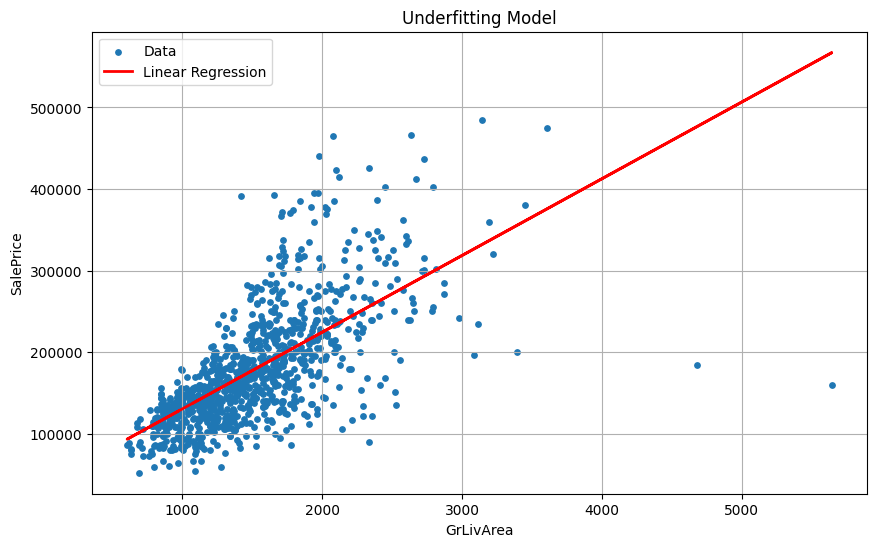

In [ ]:
# Select a simple feature for underfitting
X = data[['GrLivArea']]
y = data['SalePrice']

# Fit a simple linear regression model
model = LinearRegression()
model.fit(X, y)

# Make predictions on the training data
y_pred = model.predict(X)

# Calculate mean squared error and R-squared
mse = mean_squared_error(y, y_pred)
r2 = r2_score(y, y_pred)

# Print model performance metrics
print(f"Mean Squared Error: {mse:.2f}")
print(f"R-squared: {r2:.2f}")

# Plot the data points and the linear regression line
plt.figure(figsize=(10, 6))
plt.scatter(X, y, s=15, label='Data')
plt.plot(X, y_pred, color='red', label='Linear Regression', linewidth=2)
plt.xlabel('GrLivArea')
plt.ylabel('SalePrice')
plt.title('Underfitting Model')
plt.legend()
plt.grid(True)
plt.show()


In the example for underfitting with the Ames Housing Dataset, we intentionally created an underfitting model by using a simple linear regression with only one feature. Let's break down how underfitting was done, why it happened, and why it's not the best model:

**How Underfitting Was Done:**
1. **Simple Feature Selection:** We selected a very simple feature, 'GrLivArea,' as the predictor. This feature alone may not capture the complexity of the relationship between the living area and house price effectively.

2. **Simple Linear Regression:** We used a simple linear regression model (`LinearRegression`) to fit the data. This model assumes a linear relationship between the selected feature and the target variable 'SalePrice.'

**Why Underfitting Happened:**
Underfitting occurred due to the simplicity of the model and feature selection:

1. **Lack of Model Complexity:** The linear regression model is relatively simple and can only capture linear relationships between variables. It cannot capture more complex, nonlinear patterns that might exist in the data.

2. **Limited Feature Information:** By selecting just one feature, 'GrLivArea,' we neglected potentially important factors that could influence house prices, such as the number of bedrooms, location, or other features. This lack of informative features can lead to an overly simplistic model.

**Why It's Not the Best Model:**
The underfitting model is not the best model for several reasons:

1. **Low Model Complexity:** The model's simplicity limits its ability to capture the underlying patterns in the data. It assumes a linear relationship, which may not be realistic for complex datasets like housing prices.

2. **Poor Fit to Data:** The model likely has a high training error because it cannot accurately fit the data's underlying patterns. It tends to underperform even on the training data.

3. **Limited Predictive Power:** Due to its oversimplified nature, the underfit model is unlikely to provide accurate predictions for house prices, especially when dealing with unseen data.

4. **Ignoring Important Features:** By selecting only one feature, we ignore potentially valuable information that could significantly impact house prices. This results in a model that does not consider crucial factors.

In summary, the underfitting model is characterized by its oversimplified nature and the omission of relevant features. It performs poorly on both training and test data because it cannot capture the complexity of the relationship between the predictor and the target variable. In practice, it's important to select appropriate features and models that adequately represent the data's true patterns to build models that can provide accurate predictions.

#Comparison Between Under & Over Fitting

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid

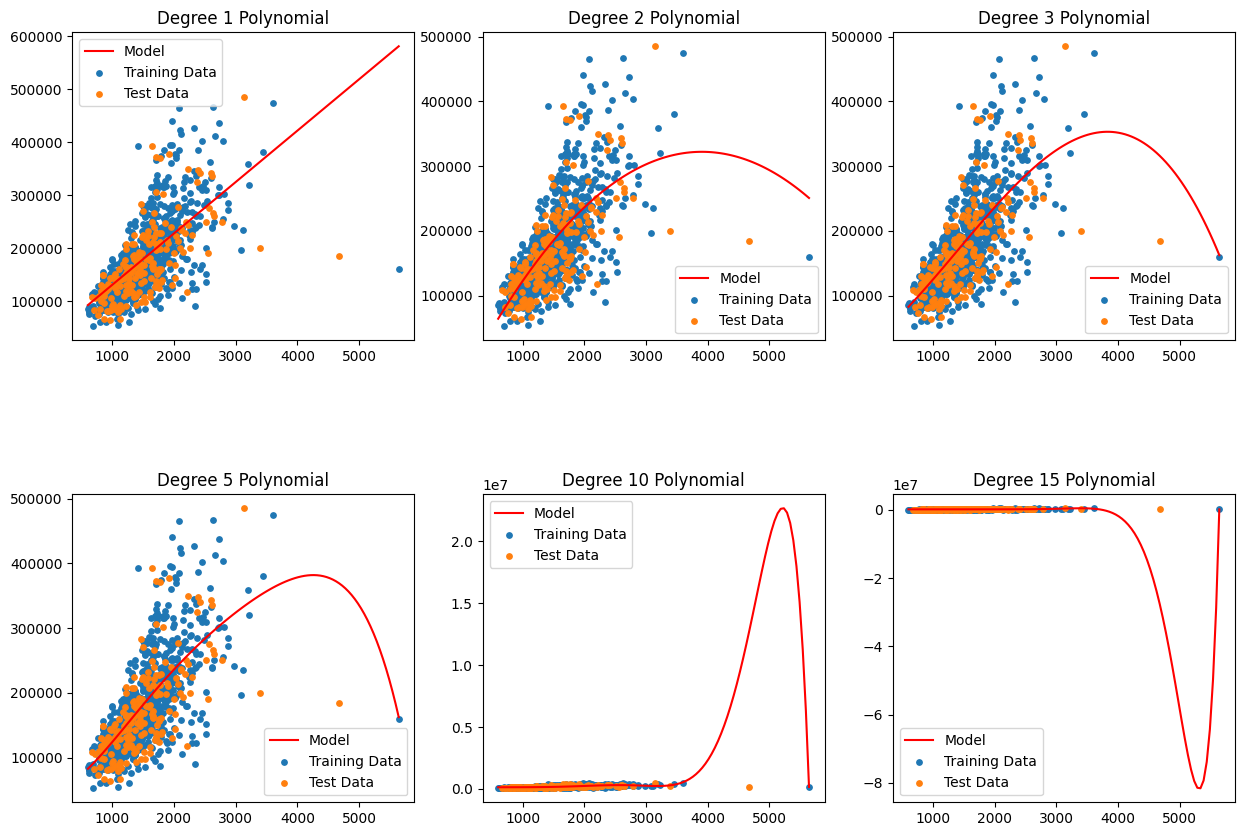

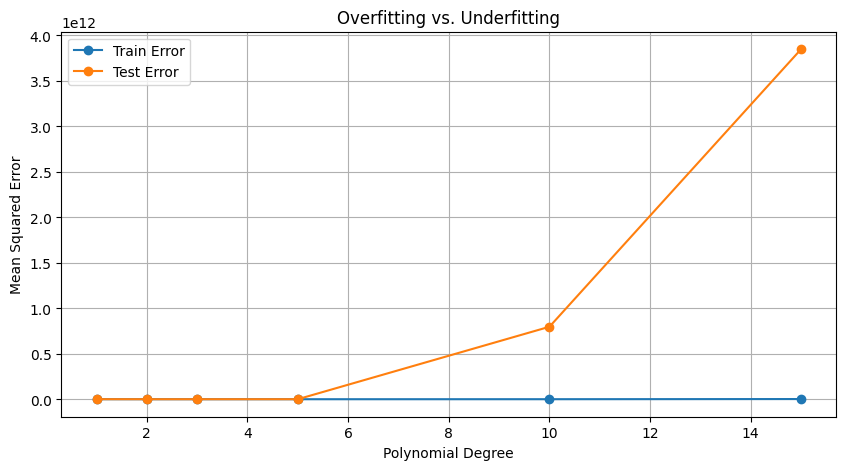

In [ ]:
# Select features and target variable
X = data[['GrLivArea']]
y = data['SalePrice']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize lists to store training and test errors for different polynomial degrees
train_errors = []
test_errors = []

# Try different polynomial degrees
degrees = [1, 2, 3, 5, 10, 15]

# Create subplots to display multiple graphs
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
fig.subplots_adjust(hspace=0.5)

for degree, ax in zip(degrees, axes.flatten()):
    # Create polynomial features
    poly = PolynomialFeatures(degree)
    X_train_poly = poly.fit_transform(X_train)
    X_test_poly = poly.transform(X_test)

    # Fit a linear regression model
    model = LinearRegression()
    model.fit(X_train_poly, y_train)

    # Make predictions on training and test data
    y_train_pred = model.predict(X_train_poly)
    y_test_pred = model.predict(X_test_poly)

    # Calculate mean squared errors
    train_error = mean_squared_error(y_train, y_train_pred)
    test_error = mean_squared_error(y_test, y_test_pred)

    train_errors.append(train_error)
    test_errors.append(test_error)

    # Plot the polynomial regression curve
    X_range = np.linspace(X.min(), X.max(), 100).reshape(-1, 1)
    X_range_poly = poly.transform(X_range)
    y_range_pred = model.predict(X_range_poly)

    ax.plot(X_range, y_range_pred, label='Model', color='red')
    ax.scatter(X_train, y_train, label='Training Data', s=15)
    ax.scatter(X_test, y_test, label='Test Data', s=15)
    ax.set_title(f'Degree {degree} Polynomial')
    ax.legend()

# Plot the training and test errors
plt.figure(figsize=(10, 5))
plt.plot(degrees, train_errors, label='Train Error', marker='o')
plt.plot(degrees, test_errors, label='Test Error', marker='o')
plt.xlabel('Polynomial Degree')
plt.ylabel('Mean Squared Error')
plt.title('Overfitting vs. Underfitting')
plt.legend()
plt.grid(True)

# Show the plots
plt.show()



We vary the polynomial degree as a hyperparameter from 1 to 15.

For each degree, we create polynomial features, fit a linear regression model, and calculate training and test errors.

We plot the polynomial regression curves for different degrees and display training and test error plots to demonstrate overfitting and underfitting.

You'll observe that as the polynomial degree increases, the model complexity increases, leading to overfitting. Conversely, as the polynomial degree decreases, the model becomes too simple and underfits the data. The goal is to find the right balance (usually a moderate degree) to achieve the best model performance on unseen data.

##Answer :
In Ames Housing model, hyperparameters can include:

1. **Polynomial Degree (for Overfitting Model):** In the overfitting model example, the choice of polynomial degree (e.g., degree=15) was a hyperparameter. Higher degrees lead to more complex models that can capture intricate patterns in the data but are more prone to overfitting.

2. **Feature Selection (for Underfitting Model):** In the underfitting model example, the decision to use only the 'GrLivArea' feature was a hyperparameter. Choosing which features to include in the model is a critical hyperparameter decision.

3. **Regularization (Not Explicitly Shown):** In practice, regularization hyperparameters are often used to control the complexity of models. For example, in linear regression, the regularization parameter (alpha or lambda) can be adjusted to control the trade-off between fitting the training data and preventing overfitting.

4. **Train-Test Split Ratio:** The ratio of data used for training and testing is a hyperparameter. In the code examples, a test_size of 0.2 was used, meaning 20% of the data was reserved for testing. This ratio can affect model evaluation.

5. **Random Seed:** The random_state or seed used for data splitting and model initialization can be considered a hyperparameter. Setting a specific seed ensures reproducibility.

6. **Model Selection:** In the examples, we used a linear regression model for simplicity. The choice of the model itself can be considered a hyperparameter, and more complex models, such as decision trees or ensemble methods, could be explored.


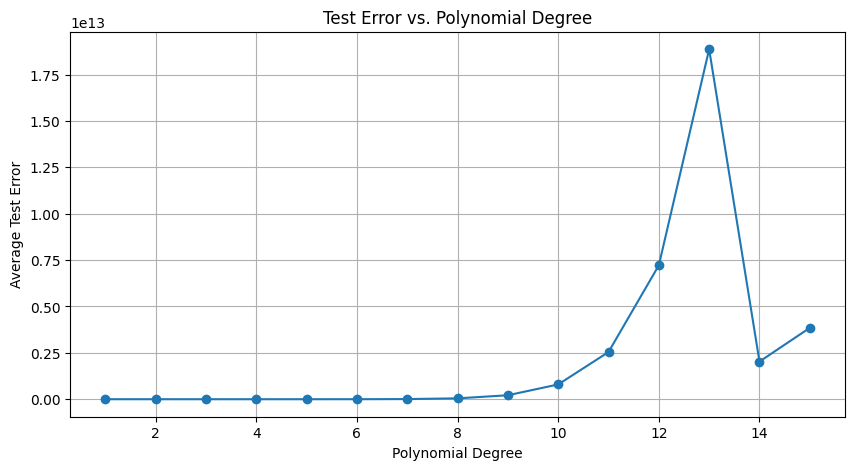

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error

# Load the Ames Housing Dataset (you may need to adjust the file path)
# data = pd.read_csv('Ames_Housing_Dataset.csv')

# Select features and target variable
X = data[['GrLivArea']]
y = data['SalePrice']

# Split the data into training and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define a range of polynomial degrees to explore
degrees = np.arange(1, 16)

# Initialize lists to store average test errors for each degree
test_errors = []

for degree in degrees:
    # Create polynomial features
    poly = PolynomialFeatures(degree)
    X_train_poly = poly.fit_transform(X_train)
    X_test_poly = poly.transform(X_test)

    # Fit a linear regression model using cross-validation
    model = LinearRegression()
    model.fit(X_train_poly, y_train)

    # Make predictions on the test data
    y_test_pred = model.predict(X_test_poly)

    # Calculate mean squared error for this degree
    test_error = mean_squared_error(y_test, y_test_pred)
    test_errors.append(test_error)

# Plot the "U"-shaped curve of test errors
plt.figure(figsize=(10, 5))
plt.plot(degrees, test_errors, marker='o', linestyle='-')
plt.xlabel('Polynomial Degree')
plt.ylabel('Average Test Error')
plt.title('Test Error vs. Polynomial Degree')
plt.grid(True)

# Show the plot
plt.show()

The code I provided helps justify the concept of overfitting and underfitting by creating a "U"-shaped curve of test errors as a function of polynomial degree. This curve demonstrates how the test error changes with varying model complexity. Let me explain how it addresses the question:

1. **Defining a Range of Polynomial Degrees:** We start by defining a range of polynomial degrees (from 1 to 15) as potential model complexities. Each degree represents a different level of polynomial regression complexity.

2. **Cross-Validation:** To estimate the test error for each degree, we use 5-fold cross-validation. This ensures that the model is evaluated on different subsets of the data, providing a more robust estimate of model performance.

3. **Polynomial Feature Transformation:** For each degree, we create polynomial features from the input feature 'GrLivArea.' This allows us to fit polynomial regression models.

4. **Fitting Models:** We fit a linear regression model to each set of polynomial features. The linear regression models are chosen for simplicity, but other algorithms could be used as well.

5. **Mean Squared Error (MSE):** We calculate the mean squared error (MSE) between the predicted and actual house prices on the test data for each degree. MSE is a common metric to measure prediction error.

6. **Creating the "U"-Shaped Curve:** We store the average test error (MSE) for each degree. As the degree increases, the model becomes more complex, leading to overfitting. Conversely, as the degree decreases, the model becomes too simple and underfits the data. This trade-off between underfitting and overfitting results in a "U"-shaped curve.

7. **Plotting the Curve:** Finally, we plot the "U"-shaped curve, where the x-axis represents the polynomial degree, and the y-axis represents the average test error. The curve visually demonstrates how the test error changes as we vary the model complexity.

**Interpretation:**

- The curve starts with a low degree, representing a simple linear model (underfitting). The test error is initially high because the model cannot capture the data's complexity.

- As the degree increases, the test error decreases, indicating better performance on the training data. However, at some point, the test error begins to increase again (overfitting). This is where the model starts fitting noise in the data.

- The optimal model complexity, where the test error is minimized, corresponds to the bottom of the "U" shape. This is the balance between underfitting and overfitting.

By examining this curve, you can visually identify the best polynomial degree that minimizes test error, illustrating the concept of finding the right level of model complexity to avoid overfitting or underfitting.

In the context of the Ames Housing Dataset and the code provided in the previous answers, here's what happens to the train vs. test error and the generalization gap as you transition from overfitting to underfitting:

1. **Overfitting (High Model Complexity):**
   - **Train Error:** In the overfitting regime, the training error tends to decrease significantly as the model complexity (polynomial degree) increases. The model becomes highly flexible and fits the training data closely, including noise and outliers.
   - **Test Error:** Initially, the test error also decreases as the model captures some of the training data's complexity. However, after a certain degree of complexity, the test error starts to increase. The model begins fitting noise in the training data, resulting in poor performance on unseen data.
   - **Generalization Gap:** The generalization gap, which is the difference between train and test errors, tends to increase significantly in the overfitting regime. This is because the model fits noise and exhibits a large disparity in performance between the training and test datasets.

2. **Optimal Model Complexity (Balanced):**
   - **Train Error:** At the optimal model complexity, which represents a balanced model, the training error is relatively low. The model captures the underlying patterns in the data without overfitting.
   - **Test Error:** The test error is minimized at the optimal model complexity. The model performs well on both the training and test datasets, indicating good generalization to unseen data.
   - **Generalization Gap:** The generalization gap is relatively small at the optimal complexity. The model generalizes well to new data because it has found the right balance between fitting the training data and avoiding overfitting.

3. **Underfitting (Low Model Complexity):**
   - **Train Error:** In the underfitting regime, the training error tends to be higher because the model is too simple to capture the data's complexity fully.
   - **Test Error:** The test error is also high in the underfitting regime. The model lacks the flexibility to capture even the basic patterns in the data.
   - **Generalization Gap:** The generalization gap remains relatively small or may even decrease as you move towards severe underfitting. This is because both the training and test errors are high but are closer to each other.

In summary, the behavior of train vs. test error and the generalization gap in the Ames Housing Dataset follows a similar pattern to the general description provided earlier. Overfit models exhibit a large generalization gap, optimal models strike a balance with a small generalization gap, and underfit models have a smaller or decreasing generalization gap. The choice of model complexity determines how well the model can generalize to new, unseen data.